In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt


# Membaca Data

In [ ]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/nabilasyukrii/Dataset/refs/heads/main/Hargacabai.csv', delimiter=';', parse_dates=['Date'])


# Strukturisasi Data
dengan X nya adalah yt-1

In [ ]:
# Buat dataframe prediktor dan respon
df2 = pd.DataFrame(zip(df['Maks'].shift(1), df['Maks']))
df2.dropna(axis=0, inplace=True)


In [ ]:
df2

0      1
1    34769.0  56426
2    56426.0  69516
3    69516.0  65824
4    65824.0  19144
5    19144.0  11657
..       ...    ...
127  72530.0  67849
128  67849.0  32930
129  32930.0  35877
130  35877.0  31321
131  31321.0  56942

[131 rows x 2 columns]

In [ ]:
# Ambil nilai array
df_sp = df2.values


# Normalisasi data

In [ ]:
# Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df_sp)
series_scaled = scaler.transform(df_sp)


In [ ]:
# Pisahkan prediktor dan respon
X, y = series_scaled[:, :-1], series_scaled[:, -1]
X = X.reshape(X.shape[0], X.shape[1], 1)


# Split Training Testing

In [ ]:
# Bagi data: 24 terakhir untuk testing
train_size = len(X) - 24
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


#Inisialisasi Hyperprameter

In [ ]:
# Buat model GRU
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

model1 = Sequential(name='GRU')
model1.add(GRU(10, input_shape=(X_train.shape[1], 1)))
model1.add(Dropout(0.15))
model1.add(Dense(1, activation='tanh'))
model1.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Buat model GRU
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

model2 = Sequential(name='GRU')
model2.add(GRU(16, input_shape=(X_train.shape[1], 1)))
model2.add(Dropout(0.15))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


In [ ]:
# Buat model GRU
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

model3 = Sequential(name='GRU')
model3.add(GRU(32, input_shape=(X_train.shape[1], 1)))
model3.add(Dropout(0.15))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


In [ ]:
# Buat model GRU
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

model4 = Sequential(name='GRU')
model4.add(GRU(128, input_shape=(X_train.shape[1], 1)))
model4.add(Dropout(0.15))
model4.add(Dense(1, activation='tanh'))
model4.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')


In [ ]:
# Buat model GRU
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

model5 = Sequential(name='GRU')
model5.add(GRU(64, input_shape=(X_train.shape[1], 1)))
model5.add(Dropout(0.15))
model5.add(Dense(1, activation='linear'))
model5.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model6 = Sequential()

# GRU layer pertama dengan return_sequences=True
model6.add(GRU(units=128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))  # Changed activation to 'tanh'
model6.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# GRU layer kedua
model6.add(GRU(units=64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))  # Changed activation to 'tanh'
model6.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# Output layer
model6.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model6.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model7 = Sequential()

# GRU layer pertama dengan return_sequences=True
model7.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))  # Changed activation to 'tanh'
model7.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# GRU layer kedua
model7.add(GRU(units=32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))  # Changed activation to 'tanh'
model7.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# Output layer
model7.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model7.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model8 = Sequential()

# GRU layer pertama dengan return_sequences=True
model8.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model8.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# GRU layer kedua
model8.add(GRU(units=32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model8.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# 3. Fully Connected Layer
model8.add(Dense(units=16, activation='relu'))  # ReLU is typically used in Dense layers

# Output layer
model8.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model8.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model9 = Sequential()

# GRU layer pertama dengan return_sequences=True
model9.add(GRU(units=128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model9.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# GRU layer kedua
model9.add(GRU(units=64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model9.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# 3. Fully Connected Layer
model9.add(Dense(units=32, activation='relu'))  # ReLU is typically used in Dense layers

# Output layer
model9.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model9.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model9.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_24 (GRU)                    │ (None, 1, 128)         │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_25 (GRU)                    │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,665 (350.25 KB)

 Trainable params: 89,665 (350.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model10 = Sequential()

# GRU layer pertama dengan return_sequences=True
model10.add(GRU(units=256, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model10.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# GRU layer kedua
model10.add(GRU(units=128, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model10.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# 3. Fully Connected Layer
model10.add(Dense(units=64, activation='relu'))  # ReLU is typically used in Dense layers

# Output layer
model10.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model10.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model11 = Sequential()

# GRU layer  (replacing LSTM with GRU)
model11.add(GRU(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model11.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model11.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model11.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model12 = Sequential()
# Membangun model LSTM
model12 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model12.add(GRU(units=8, activation='tanh', return_sequences=True, input_shape=(X.shape[1], 1), kernel_regularizer=regularizers.l2(0.01)))
model12.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model12.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model12.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# Output layer
model12.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model12.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:

model13 = Sequential()

# GRU layer pertama dengan return_sequences=True
model13.add(GRU(units=32, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model13.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model13.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model13.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model14 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model14.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model14.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model14.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model14.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model15 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model15.add(GRU(units=128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model15.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model15.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model15.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model16 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model16.add(GRU(units=256, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model16.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model16.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model16.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model17 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model17.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model17.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# LSTM layer kedua
model17.add(GRU(units=32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model17.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# Output layer
model17.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model17.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model18 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model18.add(GRU(units=128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model18.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# LSTM layer kedua
model18.add(GRU(units=64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model18.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# Output layer
model18.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model18.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model19 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model19.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model19.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# LSTM layer kedua
model19.add(GRU(units=32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model19.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# 3. Fully Connected Layer
model19.add(Dense(units=16, activation='tanh'))

# Output layer
model19.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model19.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model20 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model20.add(GRU(units=128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model20.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# LSTM layer kedua
model20.add(GRU(units=64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model9.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# 3. Fully Connected Layer
model20.add(Dense(units=32, activation='tanh'))

# Output layer
model20.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model20.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model21 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model21.add(GRU(units=256, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model21.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# LSTM layer kedua
model21.add(GRU(units=128, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model21.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# 3. Fully Connected Layer
model21.add(Dense(units=64, activation='tanh'))

# Output layer
model21.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model21.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model22 = Sequential()

# LSTM layer
model22.add(GRU(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model22.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model22.add(Dense(1, activation='tanh'))

# Kompilasi model dengan optimizer Adam
model22.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model23 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model23.add(GRU(units=8, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model23.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model23.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model23.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model24 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model24.add(GRU(units=32, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model24.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model24.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model24.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model25 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model25.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model25.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model25.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model25.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model26 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model26.add(GRU(units=128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model26.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model26.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model26.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model27 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model27.add(GRU(units=256, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model27.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# Output layer
model27.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model27.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model28 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model28.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model28.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# LSTM layer kedua
model28.add(GRU(units=32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model28.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# Output layer
model28.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model28.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
# Membangun model LSTM
model29 = Sequential()

# LSTM layer pertama dengan return_sequences=True
model29.add(GRU(units=128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model29.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# LSTM layer kedua
model29.add(GRU(units=64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model29.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# Output layer
model29.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model29.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Latih Model

In [ ]:
# Latih model
history1 = model1.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - loss: 0.2623 - val_loss: 0.0861
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1546 - val_loss: 0.0998
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1424 - val_loss: 0.1084
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1499 - val_loss: 0.0894
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1128 - val_loss: 0.0755
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1317 - val_loss: 0.0741
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1065 - val_loss: 0.0772
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1159 - val_loss: 0.0799
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1368 - val_loss: 0.0808
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1014 - val_loss: 0.0812
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0900 - val_loss: 0.0799
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0992 - val_l

In [ ]:
# Latih model
history2 = model2.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.1805 - val_loss: 0.0964
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1213 - val_loss: 0.0875
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1088 - val_loss: 0.0740
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1115 - val_loss: 0.0770
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0945 - val_loss: 0.0808
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1220 - val_loss: 0.0775
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1006 - val_loss: 0.0783
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1137 - val_loss: 0.0761
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0896 - val_loss: 0.0771
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1016 - val_loss: 0.0760
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1082 - val_loss: 0.0760
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0869 - val_l

In [ ]:
# Latih model
history3 = model3.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.3221 - val_loss: 0.1061
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1421 - val_loss: 0.1344
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1028 - val_loss: 0.0742
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1189 - val_loss: 0.0737
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1038 - val_loss: 0.0835
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1076 - val_loss: 0.0808
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0940 - val_loss: 0.0780
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0939 - val_loss: 0.0782
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1115 - val_loss: 0.0765
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1001 - val_loss: 0.0771
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1042 - val_loss: 0.0773
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0971 - val_l

In [ ]:
# Latih model
history4 = model4.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.3981 - val_loss: 0.1968
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3854 - val_loss: 0.1899
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3674 - val_loss: 0.1832
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3405 - val_loss: 0.1769
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3923 - val_loss: 0.1707
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3277 - val_loss: 0.1649
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3029 - val_loss: 0.1595
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3308 - val_loss: 0.1541
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2620 - val_loss: 0.1491
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3319 - val_loss: 0.1441
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2775 - val_loss: 0.1395
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2724 - val_lo

In [ ]:
# Latih model
history5 = model5.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.2677 - val_loss: 0.1495
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1411 - val_loss: 0.0745
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1019 - val_loss: 0.0743
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0902 - val_loss: 0.0835
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1055 - val_loss: 0.0780
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0961 - val_loss: 0.0764
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0983 - val_loss: 0.0794
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1037 - val_loss: 0.0807
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1040 - val_loss: 0.0754
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1173 - val_loss: 0.0777
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0927 - val_loss: 0.0785
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0918 - val_lo

In [ ]:
# Latih model
history6 = model6.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 1.8763 - val_loss: 1.4867
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.5172 - val_loss: 1.2722
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2781 - val_loss: 1.1149
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1029 - val_loss: 0.9758
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9400 - val_loss: 0.8302
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8445 - val_loss: 0.7061
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7234 - val_loss: 0.6092
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6127 - val_loss: 0.5286
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5535 - val_loss: 0.4589
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4806 - val_loss: 0.4019
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4051 - val_loss: 0.3500
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3768 - val_l

In [ ]:
# Latih model
history7 = model7.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.9021 - val_loss: 0.4009
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3501 - val_loss: 0.1660
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1945 - val_loss: 0.1434
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1737 - val_loss: 0.1172
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1578 - val_loss: 0.1289
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1628 - val_loss: 0.1076
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1294 - val_loss: 0.1037
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1380 - val_loss: 0.1031
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1296 - val_loss: 0.1042
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1309 - val_loss: 0.1030
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1087 - val_loss: 0.0963
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1152 - val_l

In [ ]:
# Latih model
history8 = model8.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 1.2094 - val_loss: 0.9846
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1340 - val_loss: 0.9711
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1683 - val_loss: 0.9583
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1216 - val_loss: 0.9463
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1393 - val_loss: 0.9346
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.1180 - val_loss: 0.9234
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1052 - val_loss: 0.9125
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0953 - val_loss: 0.9018
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0743 - val_loss: 0.8911
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0717 - val_loss: 0.8806
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0250 - val_loss: 0.8701
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0132 - val_l

In [ ]:
# Latih model
history9 = model9.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 1.3611 - val_loss: 0.3400
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3158 - val_loss: 0.1494
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2229 - val_loss: 0.1673
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2109 - val_loss: 0.1331
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1922 - val_loss: 0.1270
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1572 - val_loss: 0.1010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1771 - val_loss: 0.1204
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1538 - val_loss: 0.0943
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1746 - val_loss: 0.0912
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1177 - val_loss: 0.0920
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1760 - val_loss: 0.1035
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1614 - val_l

In [ ]:
# Latih model
history10 = model10.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 2.2836 - val_loss: 0.2976
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3288 - val_loss: 0.3335
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3859 - val_loss: 0.2296
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2426 - val_loss: 0.1528
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1833 - val_loss: 0.1669
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1725 - val_loss: 0.1387
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1652 - val_loss: 0.1097
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1493 - val_loss: 0.1166
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1566 - val_loss: 0.1602
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1536 - val_loss: 0.0960
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1337 - val_loss: 0.1050
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1445 - val_l

In [ ]:
# Latih model
history11 = model11.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.2045 - val_loss: 0.1545
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1246 - val_loss: 0.0756
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1305 - val_loss: 0.0781
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1025 - val_loss: 0.0848
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1155 - val_loss: 0.0786
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1079 - val_loss: 0.0754
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1089 - val_loss: 0.0826
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1104 - val_loss: 0.0789
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0909 - val_loss: 0.0752
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0972 - val_loss: 0.0795
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1041 - val_loss: 0.0758
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0919 - val_lo

In [ ]:
# Latih model
history12 = model2.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0953 - val_loss: 0.0789
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1059 - val_loss: 0.0774
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1288 - val_loss: 0.0777
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1020 - val_loss: 0.0773
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1050 - val_loss: 0.0786
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1032 - val_loss: 0.0781
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1086 - val_loss: 0.0773
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0996 - val_loss: 0.0755
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0956 - val_loss: 0.0793
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0995 - val_loss: 0.0792
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0813 - val_loss: 0.0800
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0910 - val_lo

In [ ]:
# Latih model
history13 = model13.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.3372 - val_loss: 0.1745
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3321 - val_loss: 0.1536
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3000 - val_loss: 0.1377
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2518 - val_loss: 0.1273
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2569 - val_loss: 0.1210
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2284 - val_loss: 0.1183
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2535 - val_loss: 0.1180
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2177 - val_loss: 0.1190
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2178 - val_loss: 0.1204
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2062 - val_loss: 0.1212
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2160 - val_loss: 0.1206
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1943 - val_lo

In [ ]:
# Latih model
history14 = model4.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1010 - val_loss: 0.0777
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0993 - val_loss: 0.0776
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1137 - val_loss: 0.0776
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1178 - val_loss: 0.0776
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0854 - val_loss: 0.0776
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1124 - val_loss: 0.0776
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1166 - val_loss: 0.0776
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0986 - val_loss: 0.0776
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0919 - val_loss: 0.0777
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0996 - val_loss: 0.0776
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0957 - val_loss: 0.0776
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1026 - val_lo

In [ ]:
# Latih model
history15 = model5.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1077 - val_loss: 0.0766
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0931 - val_loss: 0.0763
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1161 - val_loss: 0.0792
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1078 - val_loss: 0.0786
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0984 - val_loss: 0.0790
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1082 - val_loss: 0.0770
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0792 - val_loss: 0.0799
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0817 - val_loss: 0.0780
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0953 - val_loss: 0.0758
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1156 - val_loss: 0.0778
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0911 - val_loss: 0.0823
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0961 - val_lo

In [ ]:
# Latihmodel
history16 = model6.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1178 - val_loss: 0.0852
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1045 - val_loss: 0.0860
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0976 - val_loss: 0.0839
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1098 - val_loss: 0.0845
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1021 - val_loss: 0.0891
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1158 - val_loss: 0.0855
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1179 - val_loss: 0.0848
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1042 - val_loss: 0.0881
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0967 - val_loss: 0.0860
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1048 - val_loss: 0.0841
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1118 - val_loss: 0.0864
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1007 - val_lo

In [ ]:
# Latihmodel
history17 = model17.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 1.1443 - val_loss: 0.8790
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0302 - val_loss: 0.7768
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.8645 - val_loss: 0.6923
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7665 - val_loss: 0.6278
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6793 - val_loss: 0.5784
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6180 - val_loss: 0.5360
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5748 - val_loss: 0.4920
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5051 - val_loss: 0.4473
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4765 - val_loss: 0.4057
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4383 - val_loss: 0.3709
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4080 - val_loss: 0.3415
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3829 - val_l

In [ ]:
# Latihmodel
history18 = model18.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 1.8267 - val_loss: 1.4625
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.5332 - val_loss: 1.2405
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.2831 - val_loss: 1.0694
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0741 - val_loss: 0.9369
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9629 - val_loss: 0.8115
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8242 - val_loss: 0.6895
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7027 - val_loss: 0.5885
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5966 - val_loss: 0.5040
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5396 - val_loss: 0.4345
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4651 - val_loss: 0.3791
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4046 - val_loss: 0.3313
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3525 - val_l

In [ ]:
# Latihmodel
history19 = model19.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 1.1299 - val_loss: 0.8388
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9306 - val_loss: 0.7365
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7980 - val_loss: 0.6803
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6708 - val_loss: 0.6401
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6539 - val_loss: 0.5767
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5881 - val_loss: 0.5158
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5317 - val_loss: 0.4655
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4913 - val_loss: 0.4237
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4459 - val_loss: 0.3882
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4140 - val_loss: 0.3573
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4073 - val_loss: 0.3266
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3498 - val_l

In [ ]:
# Latihmodel
history20 = model20.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 1.8734 - val_loss: 1.4760
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5136 - val_loss: 1.2703
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2799 - val_loss: 1.1464
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1418 - val_loss: 0.9579
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9534 - val_loss: 0.8118
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8252 - val_loss: 0.6988
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7242 - val_loss: 0.6063
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5950 - val_loss: 0.5274
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5241 - val_loss: 0.4522
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4758 - val_loss: 0.3887
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3993 - val_loss: 0.3437
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3550 - val_l

In [ ]:
# Latihmodel
history21 = model21.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 3.2455 - val_loss: 2.5992
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.5319 - val_loss: 2.1352
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.0375 - val_loss: 1.6659
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.5862 - val_loss: 1.3064
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.2690 - val_loss: 1.0305
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9999 - val_loss: 0.8067
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7815 - val_loss: 0.6332
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6276 - val_loss: 0.4962
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4728 - val_loss: 0.3894
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3896 - val_loss: 0.3126
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3172 - val_loss: 0.2547
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2394 - val_l

In [ ]:
# Latihmodel
history22 = model22.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.4765 - val_loss: 0.2000
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3918 - val_loss: 0.1645
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3496 - val_loss: 0.1366
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2627 - val_loss: 0.1158
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2477 - val_loss: 0.1020
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2004 - val_loss: 0.0938
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1747 - val_loss: 0.0899
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1481 - val_loss: 0.0894
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1512 - val_loss: 0.0905
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1558 - val_loss: 0.0920
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1603 - val_loss: 0.0931
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1264 - val_lo

In [ ]:
# Latihmodel
history23 = model23.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.3671 - val_loss: 0.1959
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3442 - val_loss: 0.1941
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3644 - val_loss: 0.1923
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3328 - val_loss: 0.1906
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3624 - val_loss: 0.1888
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3303 - val_loss: 0.1872
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3467 - val_loss: 0.1854
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3157 - val_loss: 0.1838
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3284 - val_loss: 0.1822
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3474 - val_loss: 0.1806
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3078 - val_loss: 0.1792
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3425 - val_lo

In [ ]:
# Latihmodel
history24 = model24.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.3711 - val_loss: 0.2047
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3582 - val_loss: 0.2016
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3507 - val_loss: 0.1985
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3795 - val_loss: 0.1955
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3386 - val_loss: 0.1926
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3433 - val_loss: 0.1898
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3441 - val_loss: 0.1870
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3335 - val_loss: 0.1843
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3506 - val_loss: 0.1817
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3150 - val_loss: 0.1792
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3474 - val_loss: 0.1768
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3007 - val_lo

In [ ]:
# Latihmodel
history25 = model25.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.4467 - val_loss: 0.2225
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4001 - val_loss: 0.2171
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3632 - val_loss: 0.2118
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3972 - val_loss: 0.2067
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3909 - val_loss: 0.2016
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3490 - val_loss: 0.1969
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3674 - val_loss: 0.1924
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3205 - val_loss: 0.1882
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3759 - val_loss: 0.1840
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3489 - val_loss: 0.1800
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3640 - val_loss: 0.1760
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3289 - val_lo

In [ ]:
# Latihmodel
history26 = model26.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.3904 - val_loss: 0.2177
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4168 - val_loss: 0.2114
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3967 - val_loss: 0.2055
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3580 - val_loss: 0.2000
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3704 - val_loss: 0.1946
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3493 - val_loss: 0.1893
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3809 - val_loss: 0.1843
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3529 - val_loss: 0.1796
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3231 - val_loss: 0.1752
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3254 - val_loss: 0.1709
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3180 - val_loss: 0.1668
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3110 - val_lo

In [ ]:
# Latihmodel
history27 = model27.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.4240 - val_loss: 0.2290
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4177 - val_loss: 0.2197
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3835 - val_loss: 0.2109
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4187 - val_loss: 0.2025
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3769 - val_loss: 0.1948
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3906 - val_loss: 0.1874
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3100 - val_loss: 0.1807
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3196 - val_loss: 0.1743
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3170 - val_loss: 0.1684
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2809 - val_loss: 0.1625
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3237 - val_loss: 0.1572
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3087 - val_lo

In [ ]:
# Latihmodel
history28 = model28.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 1.1433 - val_loss: 0.9738
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.1511 - val_loss: 0.9615
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.1387 - val_loss: 0.9494
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.1303 - val_loss: 0.9375
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.1060 - val_loss: 0.9258
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0717 - val_loss: 0.9143
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.0691 - val_loss: 0.9030
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0722 - val_loss: 0.8919
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0149 - val_loss: 0.8810
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0329 - val_loss: 0.8701
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0103 - val_loss: 0.8594
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0365 - val_l

In [ ]:
# Latihmodel
history29 = model29.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 1.9056 - val_loss: 1.7387
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9043 - val_loss: 1.7093
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.8509 - val_loss: 1.6805
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.8287 - val_loss: 1.6523
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.7864 - val_loss: 1.6248
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7917 - val_loss: 1.5977
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.7531 - val_loss: 1.5715
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7207 - val_loss: 1.5457
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.6726 - val_loss: 1.5204
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.6276 - val_loss: 1.4958
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.6014 - val_loss: 1.4717
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6059 - val_l

# Evaluasi Model

In [ ]:
histories1 = [history1, history2, history3, history4, history5, history6, history7,history8]

In [ ]:
histories2 = [history9, history10, history11, history12, history13, history14, history15,history16]

In [ ]:
histories3=[history17,history18,history19,history20]

In [ ]:
histories4=[history21,history22,history23,history24,history25,history26,history27,history28,history29]

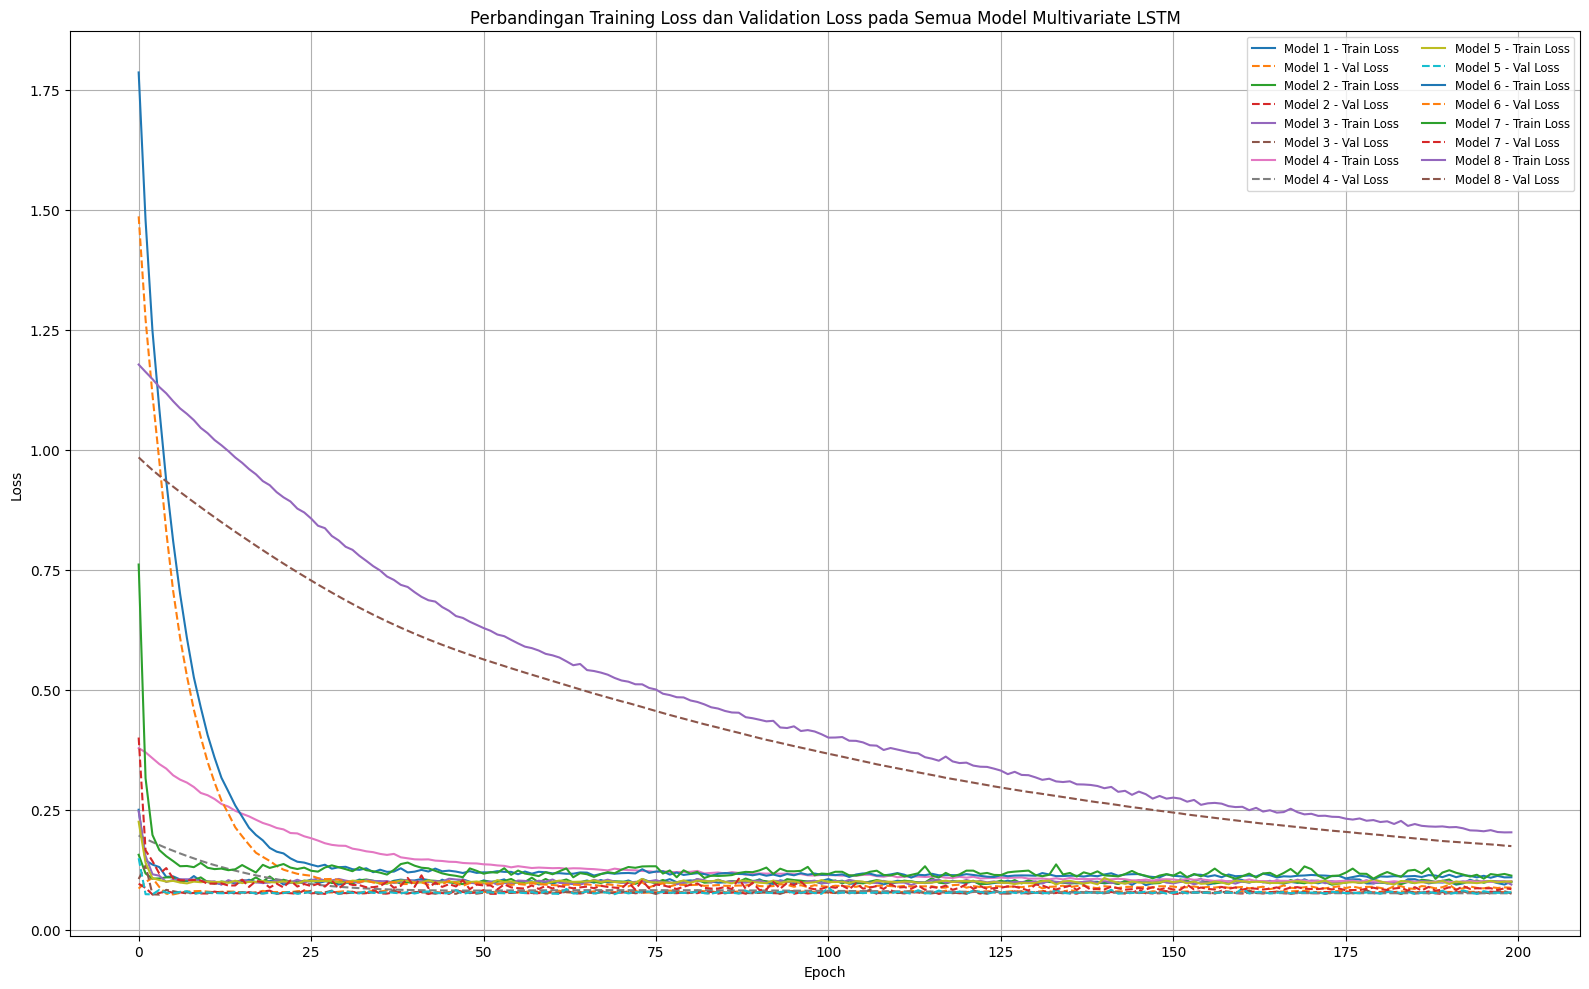

In [ ]:
plt.figure(figsize=(16, 10))

# Loop untuk menampilkan plot setiap model
for i, hist in enumerate(histories1):
    plt.plot(hist.history['loss'], label=f'Model {i+1} - Train Loss', linestyle='-')
    plt.plot(hist.history['val_loss'], label=f'Model {i+1} - Val Loss', linestyle='--')

plt.title('Perbandingan Training Loss dan Validation Loss pada Semua Model Multivariate LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

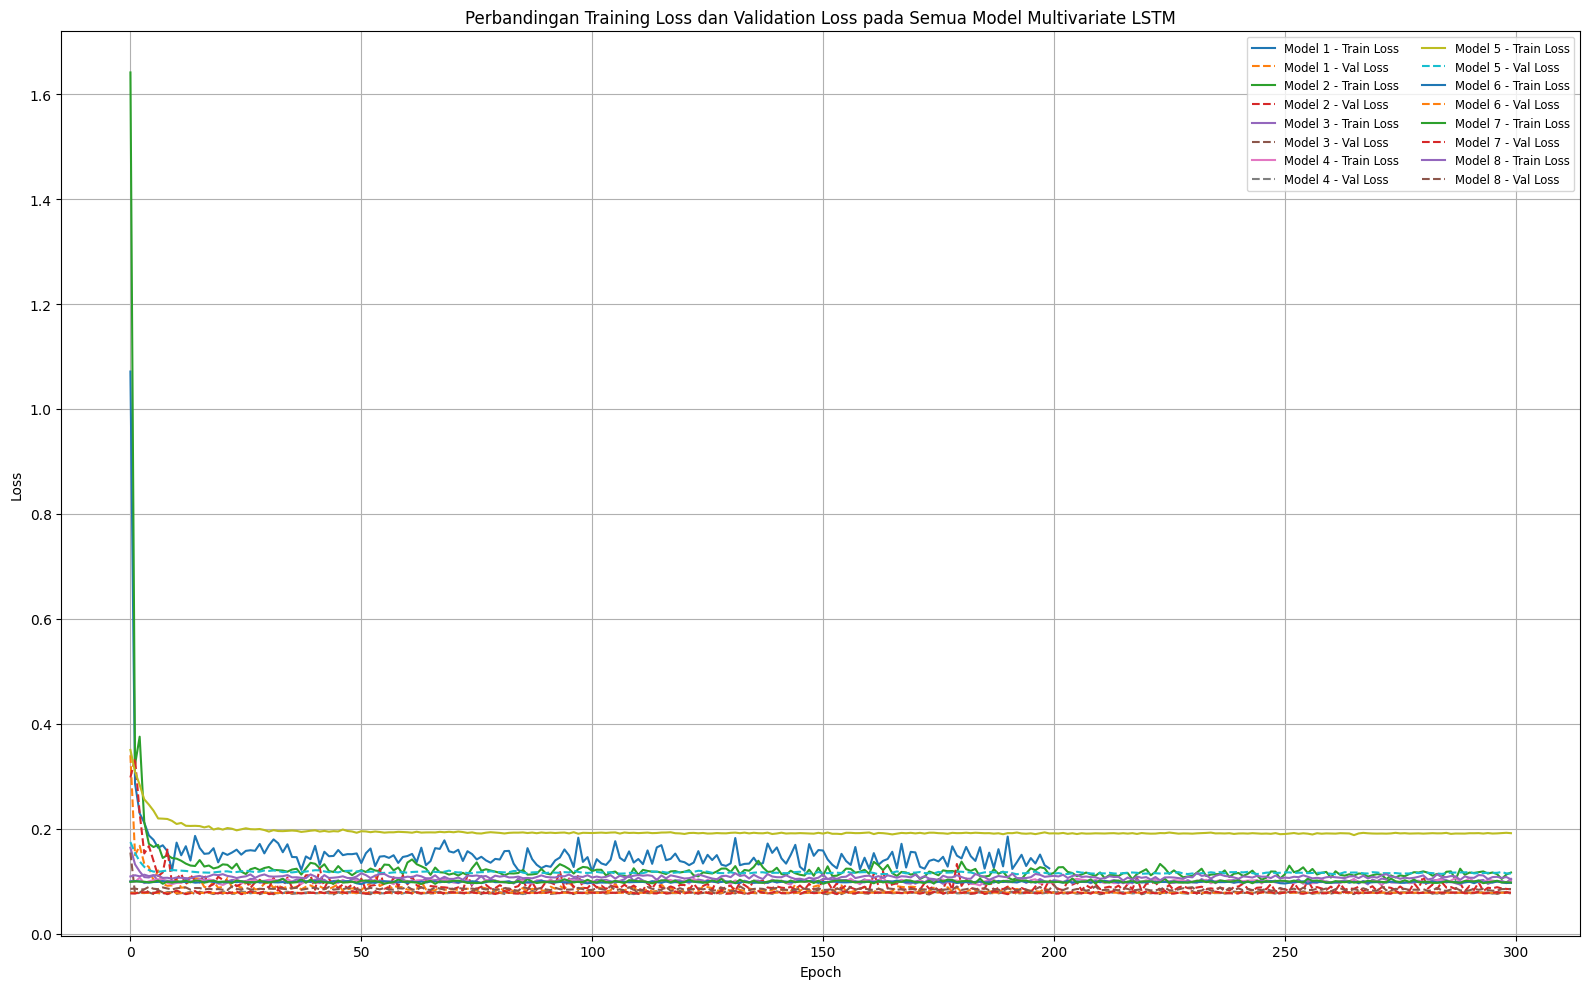

In [ ]:
plt.figure(figsize=(16, 10))

# Loop untuk menampilkan plot setiap model
for i, hist in enumerate(histories2):
    plt.plot(hist.history['loss'], label=f'Model {i+1} - Train Loss', linestyle='-')
    plt.plot(hist.history['val_loss'], label=f'Model {i+1} - Val Loss', linestyle='--')

plt.title('Perbandingan Training Loss dan Validation Loss pada Semua Model Multivariate LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

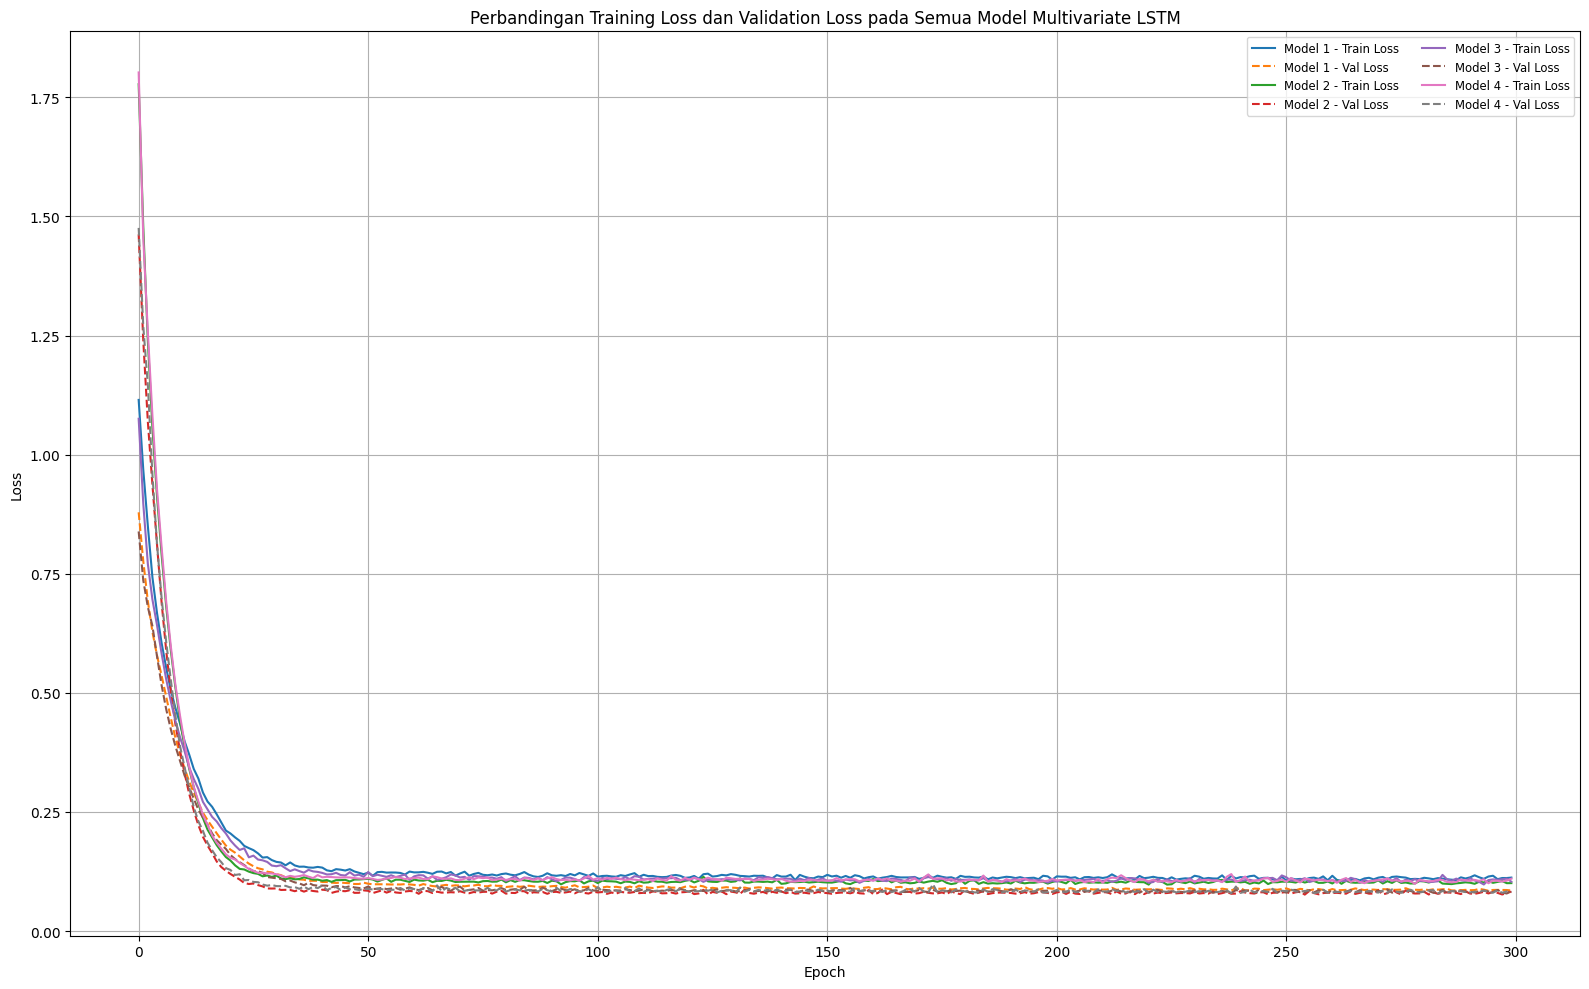

In [ ]:
plt.figure(figsize=(16, 10))

# Loop untuk menampilkan plot setiap model
for i, hist in enumerate(histories3):
    plt.plot(hist.history['loss'], label=f'Model {i+1} - Train Loss', linestyle='-')
    plt.plot(hist.history['val_loss'], label=f'Model {i+1} - Val Loss', linestyle='--')

plt.title('Perbandingan Training Loss dan Validation Loss pada Semua Model Multivariate LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

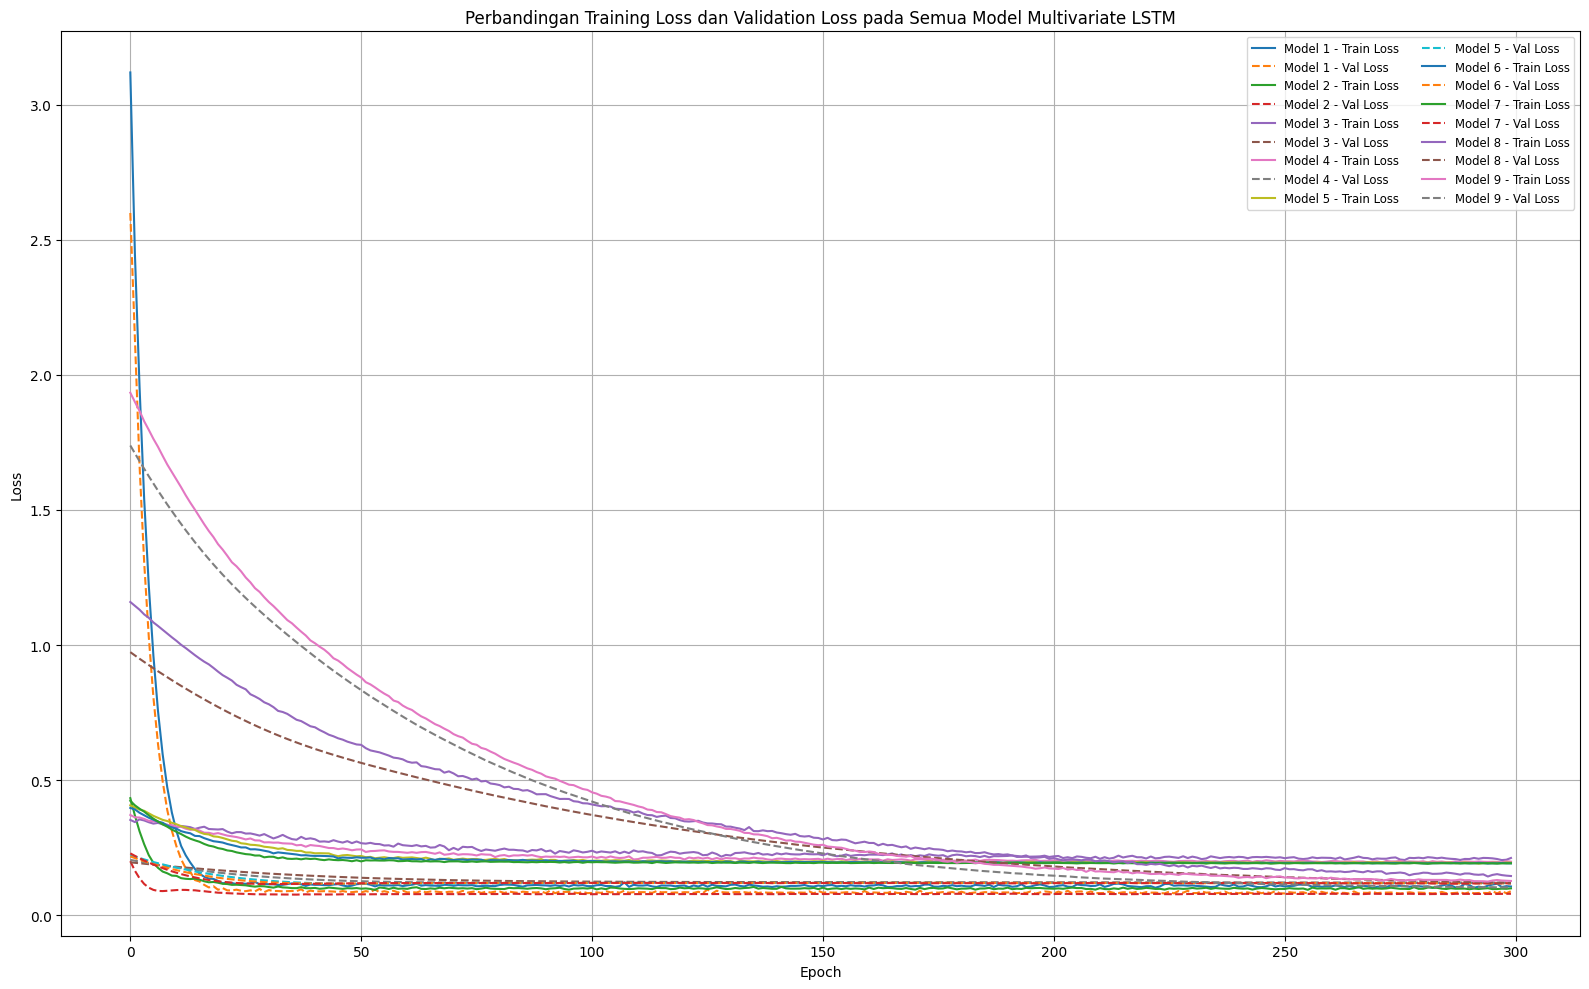

In [ ]:
plt.figure(figsize=(16, 10))

# Loop untuk menampilkan plot setiap model
for i, hist in enumerate(histories4):
    plt.plot(hist.history['loss'], label=f'Model {i+1} - Train Loss', linestyle='-')
    plt.plot(hist.history['val_loss'], label=f'Model {i+1} - Val Loss', linestyle='--')

plt.title('Perbandingan Training Loss dan Validation Loss pada Semua Model Multivariate LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

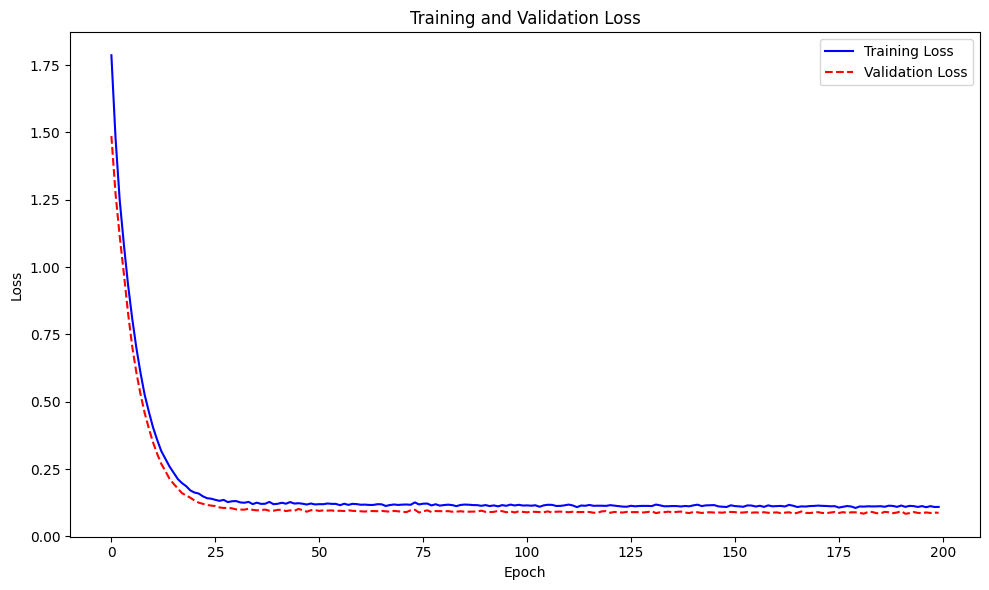

In [ ]:
# prompt: buat untuk training loss warna merah dan validationloss warna biru dengan gars putus

import matplotlib.pyplot as plt

# Assuming 'history6' is your training history object
plt.figure(figsize=(10, 6))

plt.plot(history6.history['loss'], color='blue', label='Training Loss')
plt.plot(history6.history['val_loss'], color='red', linestyle='--', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


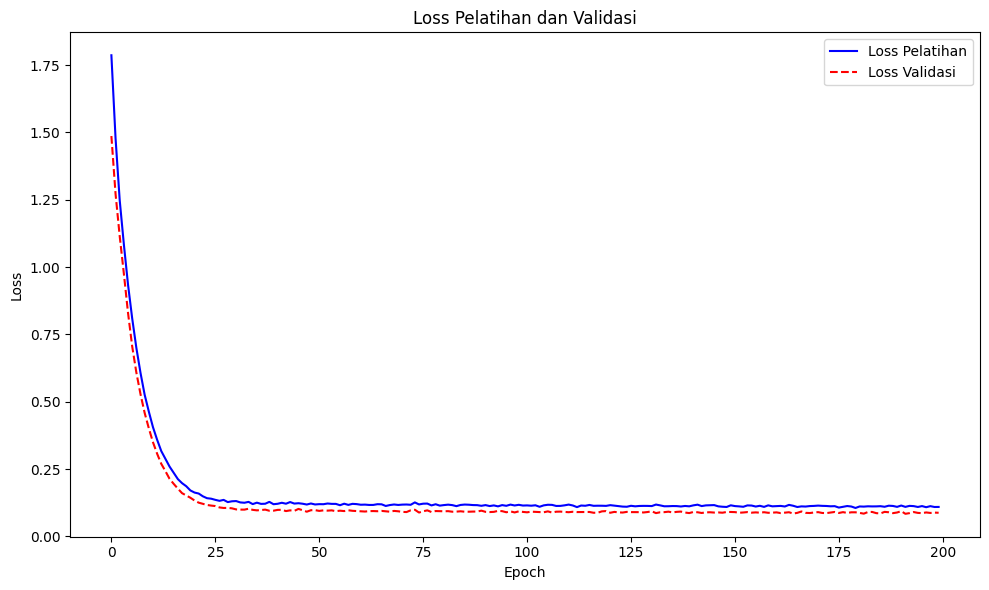

In [ ]:
import matplotlib.pyplot as plt

# Mengasumsikan 'history6' adalah objek riwayat pelatihan Anda
plt.figure(figsize=(10, 6))

# Plot Loss Pelatihan (warna biru)
plt.plot(history6.history['loss'], color='blue', label='Loss Pelatihan')
# Plot Loss Validasi (warna merah, garis putus-putus)
plt.plot(history6.history['val_loss'], color='red', linestyle='--', label='Loss Validasi')

# Judul plot
plt.title('Loss Pelatihan dan Validasi')
# Label sumbu x
plt.xlabel('Epoch')
# Label sumbu y
plt.ylabel('Loss')
# Menampilkan legenda
plt.legend()
# Menonaktifkan grid
plt.grid(False)
# Mengatur tata letak plot
plt.tight_layout()
# Menampilkan plot
plt.show()

# Prediksi

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Asumsikan kamu punya list model
models = [model1, model2, model3, model4, model5, model6, model7, model8]

# Inisialisasi list untuk menyimpan MAPE
mape_train_list = []
mape_test_list = []

for i, model in enumerate(models):
        # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Ambil timestep terakhir jika prediksi 3D
    if y_train_pred.ndim == 3:
        y_train_pred = y_train_pred[:, -1, :]
        y_test_pred = y_test_pred[:, -1, :]

    # Ubah shape
    y_train_pred = y_train_pred.reshape(-1, 1)
    y_test_pred = y_test_pred.reshape(-1, 1)

    # Inverse transform
    # --- Change: Create temporary arrays with the correct shape (num_samples, 2) for inverse_transform ---
    temp_array_train = np.hstack([y_train_pred, np.zeros_like(y_train_pred)]) # Reshape to (107, 2)
    y_train_pred_rescaled = scaler.inverse_transform(temp_array_train)[:, 0]

    temp_array_y_train = np.hstack([y_train.reshape(-1, 1), np.zeros_like(y_train.reshape(-1, 1))]) # Reshape to (107, 2)
    y_train_rescaled = scaler.inverse_transform(temp_array_y_train)[:, 0]

    temp_array_test = np.hstack([y_test_pred, np.zeros_like(y_test_pred)]) # Reshape to (24, 2)
    y_test_pred_rescaled = scaler.inverse_transform(temp_array_test)[:, 0]

    temp_array_y_test = np.hstack([y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))]) # Reshape to (24, 2)
    y_test_rescaled = scaler.inverse_transform(temp_array_y_test)[:, 0]

    # Hitung MAPE
    mape_train = mean_absolute_percentage_error(y_train_rescaled, y_train_pred_rescaled)
    mape_test = mean_absolute_percentage_error(y_test_rescaled, y_test_pred_rescaled)

    mape_train_list.append(mape_train)
    mape_test_list.append(mape_test)

    print(f'Model {i+1} - MAPE Train: {mape_train*100:.2f}%, MAPE Test: {mape_test*100:.2f}%')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 1 - MAPE Train: 39.45%, MAPE Test: 25.49%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 2 - MAPE Train: 41.60%, MAPE Test: 26.83%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model 3 - MAPE Train: 43.24%, MAPE Test: 27.51%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Model 4 - MAPE Train: 43.14%, MAPE Test: 25.49%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Model 5 - MAPE Train: 38.51%, MAPE Test: 26.18%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Model 6 - MAPE Train: 40.59%, MAPE Test: 25.71%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Model 7 - MAPE Train: 120.79%, MAPE Test: 58.89%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Model 8 - MAPE Train: 43.00%, MAPE Test: 26.12%


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Asumsikan kamu punya list model
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11,
          model12,model13,model14,model15,model16,model17,model18,model19,model20]

# Inisialisasi list untuk menyimpan MAPE
mape_train_list = []
mape_test_list = []

for i, model in enumerate(models):
        # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Ambil timestep terakhir jika prediksi 3D
    if y_train_pred.ndim == 3:
        y_train_pred = y_train_pred[:, -1, :]
        y_test_pred = y_test_pred[:, -1, :]

    # Ubah shape
    y_train_pred = y_train_pred.reshape(-1, 1)
    y_test_pred = y_test_pred.reshape(-1, 1)

    # Inverse transform
    # --- Change: Create temporary arrays with the correct shape (num_samples, 2) for inverse_transform ---
    temp_array_train = np.hstack([y_train_pred, np.zeros_like(y_train_pred)]) # Reshape to (107, 2)
    y_train_pred_rescaled = scaler.inverse_transform(temp_array_train)[:, 0]

    temp_array_y_train = np.hstack([y_train.reshape(-1, 1), np.zeros_like(y_train.reshape(-1, 1))]) # Reshape to (107, 2)
    y_train_rescaled = scaler.inverse_transform(temp_array_y_train)[:, 0]

    temp_array_test = np.hstack([y_test_pred, np.zeros_like(y_test_pred)]) # Reshape to (24, 2)
    y_test_pred_rescaled = scaler.inverse_transform(temp_array_test)[:, 0]

    temp_array_y_test = np.hstack([y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))]) # Reshape to (24, 2)
    y_test_rescaled = scaler.inverse_transform(temp_array_y_test)[:, 0]

    # Hitung MAPE
    mape_train = mean_absolute_percentage_error(y_train_rescaled, y_train_pred_rescaled)
    mape_test = mean_absolute_percentage_error(y_test_rescaled, y_test_pred_rescaled)

    mape_train_list.append(mape_train)
    mape_test_list.append(mape_test)

    print(f'Model {i+1} - MAPE Train: {mape_train*100:.2f}%, MAPE Test: {mape_test*100:.2f}%')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model 1 - MAPE Train: 39.45%, MAPE Test: 25.49%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model 2 - MAPE Train: 41.60%, MAPE Test: 26.83%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 3 - MAPE Train: 43.24%, MAPE Test: 27.51%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Model 4 - MAPE Train: 43.14%, MAPE Test: 25.49%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Model 5 - MAPE Train: 38.51%, MAPE Test: 26.18%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model 6 - MAPE Train: 40.59%, MAPE Test: 25.71%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 7 - MAPE Train: 120.79%, MAPE Test: 58.89%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model 8 - MAPE Train: 43.00%, MAPE Test: 26.12%
4/4 ━━━

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Asumsikan kamu punya list model
models = [model21, model22, model23, model24, model25, model26, model27, model28, model29]

# Inisialisasi list untuk menyimpan MAPE
mape_train_list = []
mape_test_list = []

for i, model in enumerate(models):
        # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Ambil timestep terakhir jika prediksi 3D
    if y_train_pred.ndim == 3:
        y_train_pred = y_train_pred[:, -1, :]
        y_test_pred = y_test_pred[:, -1, :]

    # Ubah shape
    y_train_pred = y_train_pred.reshape(-1, 1)
    y_test_pred = y_test_pred.reshape(-1, 1)

    # Inverse transform
    # --- Change: Create temporary arrays with the correct shape (num_samples, 2) for inverse_transform ---
    temp_array_train = np.hstack([y_train_pred, np.zeros_like(y_train_pred)]) # Reshape to (107, 2)
    y_train_pred_rescaled = scaler.inverse_transform(temp_array_train)[:, 0]

    temp_array_y_train = np.hstack([y_train.reshape(-1, 1), np.zeros_like(y_train.reshape(-1, 1))]) # Reshape to (107, 2)
    y_train_rescaled = scaler.inverse_transform(temp_array_y_train)[:, 0]

    temp_array_test = np.hstack([y_test_pred, np.zeros_like(y_test_pred)]) # Reshape to (24, 2)
    y_test_pred_rescaled = scaler.inverse_transform(temp_array_test)[:, 0]

    temp_array_y_test = np.hstack([y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))]) # Reshape to (24, 2)
    y_test_rescaled = scaler.inverse_transform(temp_array_y_test)[:, 0]

    # Hitung MAPE
    mape_train = mean_absolute_percentage_error(y_train_rescaled, y_train_pred_rescaled)
    mape_test = mean_absolute_percentage_error(y_test_rescaled, y_test_pred_rescaled)

    mape_train_list.append(mape_train)
    mape_test_list.append(mape_test)

    print(f'Model {i+1} - MAPE Train: {mape_train*100:.2f}%, MAPE Test: {mape_test*100:.2f}%')


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model 1 - MAPE Train: 122.51%, MAPE Test: 59.65%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model 2 - MAPE Train: 118.49%, MAPE Test: 57.86%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Model 3 - MAPE Train: 143.66%, MAPE Test: 69.95%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 4 - MAPE Train: 124.22%, MAPE Test: 60.27%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model 5 - MAPE Train: 108.56%, MAPE Test: 53.68%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Model 6 - MAPE Train: 120.94%, MAPE Test: 58.94%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 7 - MAPE Train: 125.25%, MAPE Test: 60.87%
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model 8 - MAPE Train: 119.74%, MAPE Test: 58.39

In [ ]:
# Prediksi menggunakan model
y_pred = model1.predict(X_test)

# Kembalikan skala asli (inverse transform)
# --- Change: Provide an array with 2 features to inverse_transform ---
y_pred_rescaled = scaler.inverse_transform(np.hstack((y_pred, np.zeros_like(y_pred))))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1)))))[:, 0]

# Evaluasi dengan MAPE
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
print(f'MAPE: {mape * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
MAPE: 25.49%


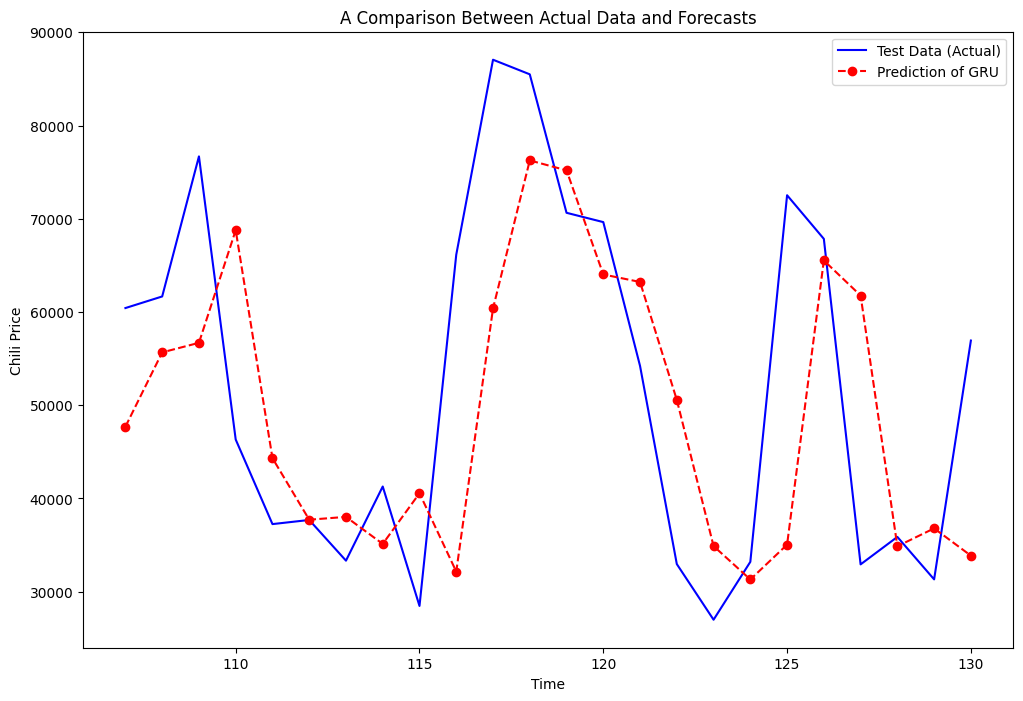

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Correct the x-axis data to match the length of y_test_rescaled
plt.plot(df.index[len(X_train):len(X_train) + len(y_test_rescaled)], y_test_rescaled, label='Test Data (Actual)', color='blue')
plt.plot(df.index[len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='Prediction of GRU', color='red', linestyle='--',marker='o')


plt.title('A Comparison Between Actual Data and Forecasts')
plt.xlabel('Time')
plt.ylabel('Chili Price')
plt.legend()
plt.grid(False)
plt.show()

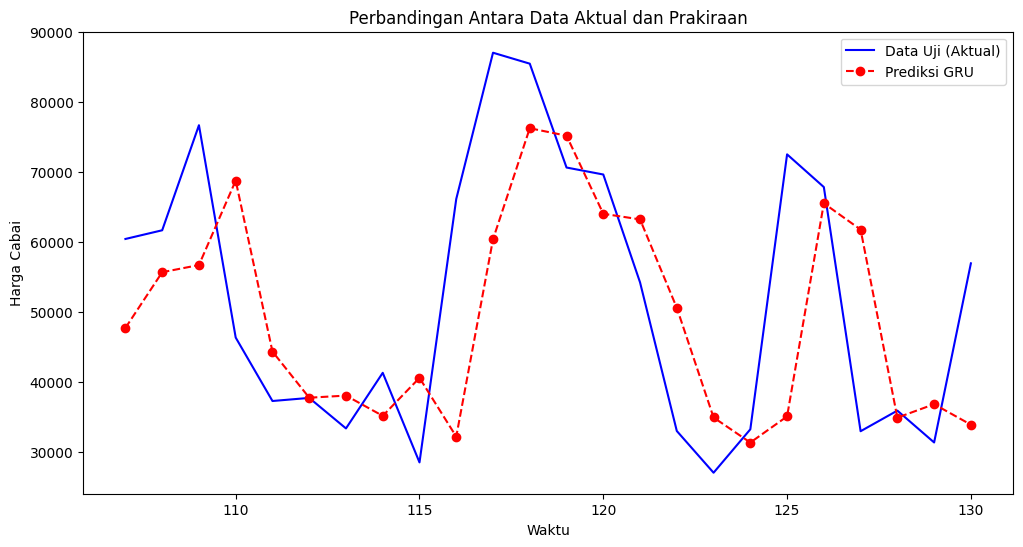

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Koreksi data sumbu-x agar sesuai dengan panjang y_test_rescaled
plt.plot(df.index[len(X_train):len(X_train) + len(y_test_rescaled)], y_test_rescaled, label='Data Uji (Aktual)', color='blue')
plt.plot(df.index[len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='Prediksi GRU', color='red', linestyle='--', marker='o')

plt.title('Perbandingan Antara Data Aktual dan Prakiraan')
plt.xlabel('Waktu')
plt.ylabel('Harga Cabai')
plt.legend()
plt.grid(False)
plt.show()


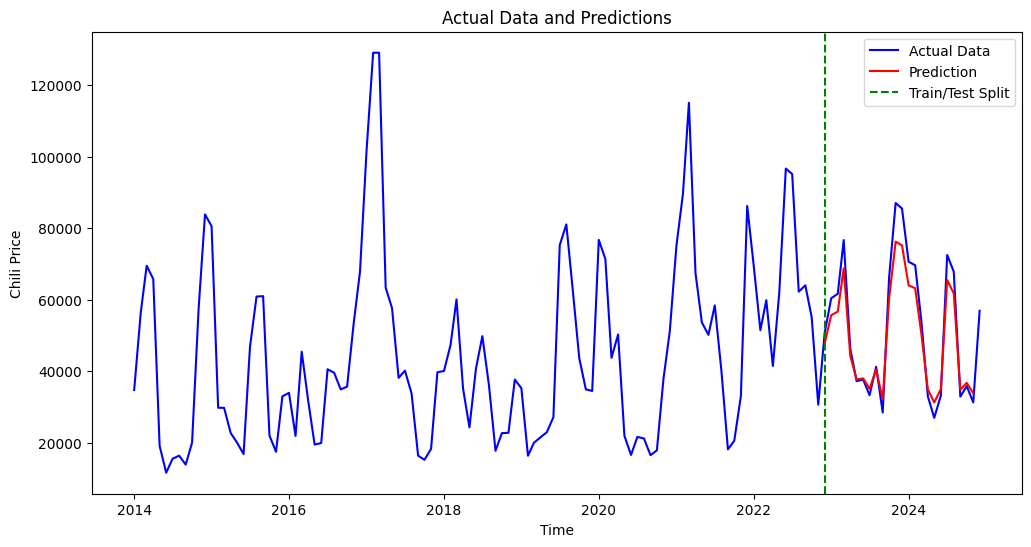

In [ ]:
# prompt: berikan sintaks uintuk menampilkan plot seluruh data beserta prediksi\

plt.figure(figsize=(12, 6))

# Plot the entire dataset
plt.plot(df['Date'], df['Maks'], label='Actual Data', color='blue')

# Plot the predictions
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='Prediction', color='red')

plt.axvline(x=df['Date'][len(X_train)], color='green', linestyle='--', label='Train/Test Split')

plt.title('Actual Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Chili Price')
plt.legend()
plt.grid(False)
plt.show()


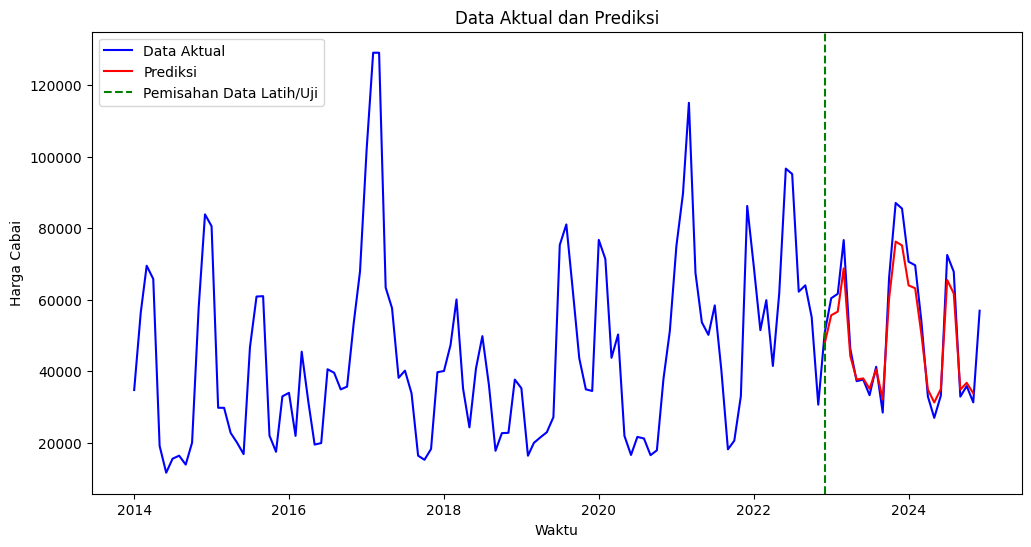

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot seluruh dataset
plt.plot(df['Date'], df['Maks'], label='Data Aktual', color='blue')

# Plot prediksi
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='Prediksi', color='red')

# Garis vertikal untuk pemisahan data latih dan uji
plt.axvline(x=df['Date'][len(X_train)], color='green', linestyle='--', label='Pemisahan Data Latih/Uji')

plt.title('Data Aktual dan Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Harga Cabai')
plt.legend()
plt.grid(False)
plt.show()

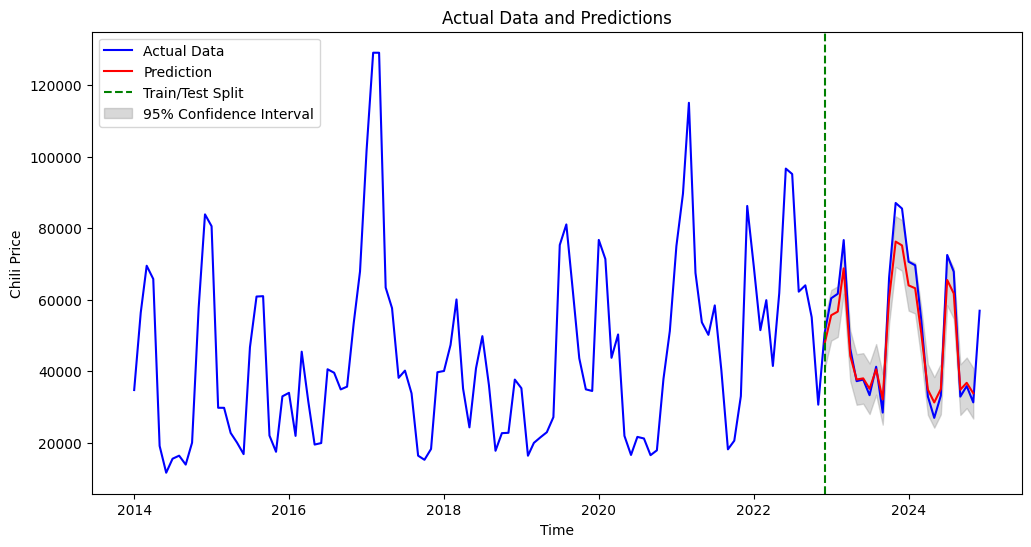

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.figure(figsize=(12, 6))

# Plot the entire dataset
plt.plot(df['Date'], df['Maks'], label='Actual Data', color='blue')

# Plot the predictions with markers
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='Prediction', color='red')

plt.axvline(x=df['Date'][len(X_train)], color='green', linestyle='--', label='Train/Test Split')

# Calculate Confidence Intervals
confidence_level = 0.95
prediction_errors = y_test_rescaled - y_pred_rescaled
interval = stats.t.interval(confidence_level, len(prediction_errors) - 1, loc=y_pred_rescaled, scale=stats.sem(prediction_errors))

# Plot Confidence Intervals
plt.fill_between(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], interval[0], interval[1], color='gray', alpha=0.3, label=f'{confidence_level*100:.0f}% Confidence Interval')

plt.title('Actual Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Chili Price')
plt.legend()
plt.grid(False)


plt.show()

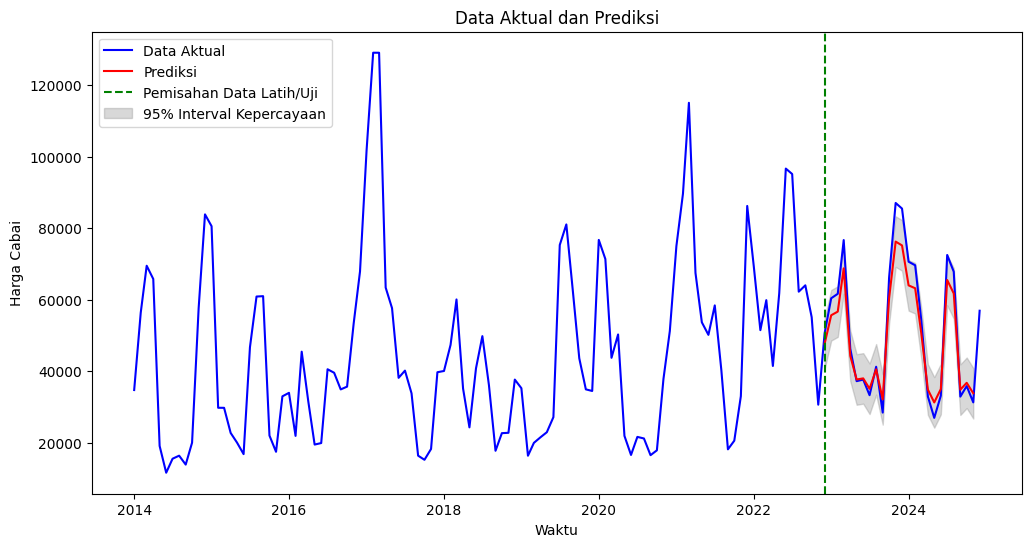

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.figure(figsize=(12, 6))

# Plot seluruh dataset
plt.plot(df['Date'], df['Maks'], label='Data Aktual', color='blue')

# Plot prediksi dengan penanda
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='Prediksi', color='red')

# Garis vertikal untuk pemisahan data latih dan uji
plt.axvline(x=df['Date'][len(X_train)], color='green', linestyle='--', label='Pemisahan Data Latih/Uji')

# Hitung Interval Kepercayaan
tingkat_kepercayaan = 0.95
galat_prediksi = y_test_rescaled - y_pred_rescaled
interval = stats.t.interval(tingkat_kepercayaan, len(galat_prediksi) - 1, loc=y_pred_rescaled, scale=stats.sem(galat_prediksi))

# Plot Interval Kepercayaan
plt.fill_between(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], interval[0], interval[1], color='gray', alpha=0.3, label=f'{tingkat_kepercayaan*100:.0f}% Interval Kepercayaan')

plt.title('Data Aktual dan Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Harga Cabai')
plt.legend()
plt.grid(False)

plt.show()

In [ ]:
pred_arima=pd.read_csv('https://raw.githubusercontent.com/nabilasyukrii/Dataset/refs/heads/main/test_predictions_arima_fix.csv', delimiter=',', parse_dates=['Date'])

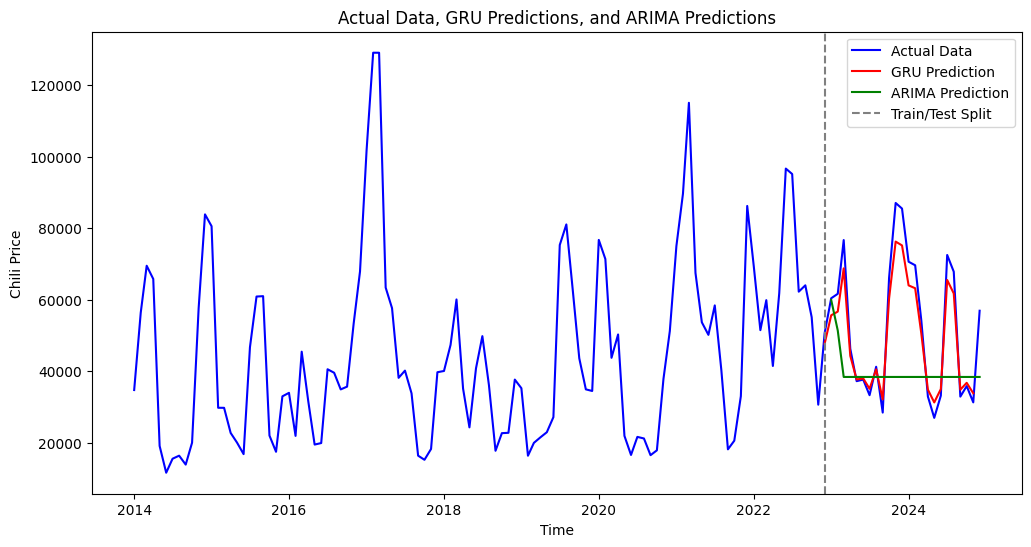

In [ ]:
# prompt: berdasarkan data pred_arima saya mau menggabungkannya dalam plot sebelumnya dengan warna orange

# Assuming 'pred_arima' DataFrame has 'Date' and 'Prediction' columns
plt.figure(figsize=(12, 6))

# Plot the entire dataset
plt.plot(df['Date'], df['Maks'], label='Actual Data', color='blue')

# Plot the GRU predictions
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='GRU Prediction', color='red')

# Plot the ARIMA predictions
plt.plot(pred_arima['Date'], pred_arima['Predicted_Price'], label='ARIMA Prediction', color='green')


plt.axvline(x=df['Date'][len(X_train)], color='grey', linestyle='--', label='Train/Test Split')

# Calculate Confidence Intervals (same as before)
confidence_level = 0.95
prediction_errors = y_test_rescaled - y_pred_rescaled
interval = stats.t.interval(confidence_level, len(prediction_errors) - 1, loc=y_pred_rescaled, scale=stats.sem(prediction_errors))

plt.title('Actual Data, GRU Predictions, and ARIMA Predictions')
plt.xlabel('Time')
plt.ylabel('Chili Price')
plt.legend()
plt.grid(False)
plt.show()


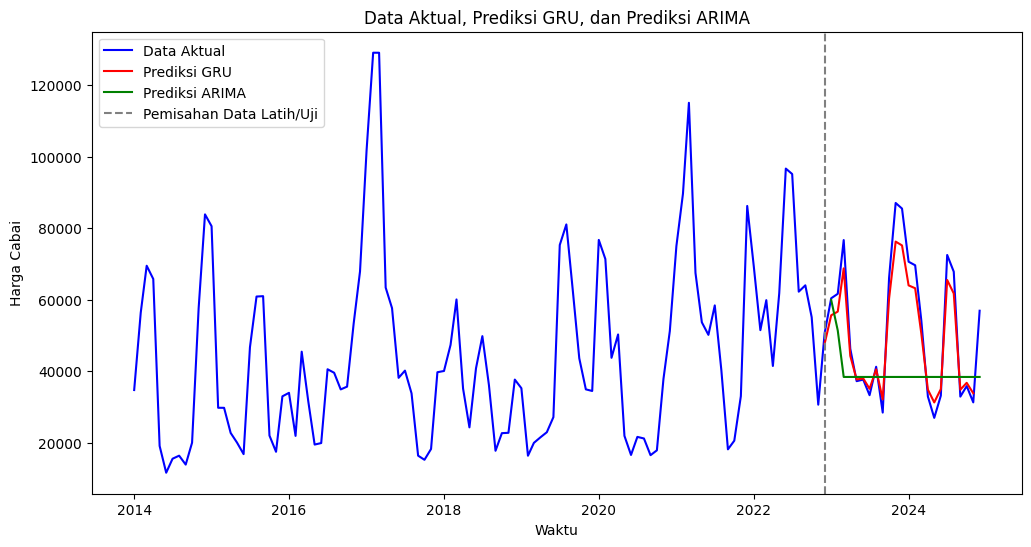

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.figure(figsize=(12, 6))

# Plot seluruh dataset
plt.plot(df['Date'], df['Maks'], label='Data Aktual', color='blue')

# Plot prediksi GRU
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='Prediksi GRU', color='red')

# Plot prediksi ARIMA
plt.plot(pred_arima['Date'], pred_arima['Predicted_Price'], label='Prediksi ARIMA', color='green')

# Garis vertikal untuk pemisahan data latih dan uji
plt.axvline(x=df['Date'][len(X_train)], color='grey', linestyle='--', label='Pemisahan Data Latih/Uji')

# Hitung Interval Kepercayaan (sama seperti sebelumnya)
tingkat_kepercayaan = 0.95
galat_prediksi = y_test_rescaled - y_pred_rescaled
interval = stats.t.interval(tingkat_kepercayaan, len(galat_prediksi) - 1, loc=y_pred_rescaled, scale=stats.sem(galat_prediksi))

# Plot Interval Kepercayaan (opsional, jika ingin ditampilkan)
# plt.fill_between(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], interval[0], interval[1], color='gray', alpha=0.3, label=f'{tingkat_kepercayaan*100:.0f}% Interval Kepercayaan')

plt.title('Data Aktual, Prediksi GRU, dan Prediksi ARIMA')
plt.xlabel('Waktu')
plt.ylabel('Harga Cabai')
plt.legend()
plt.grid(False)
plt.show()

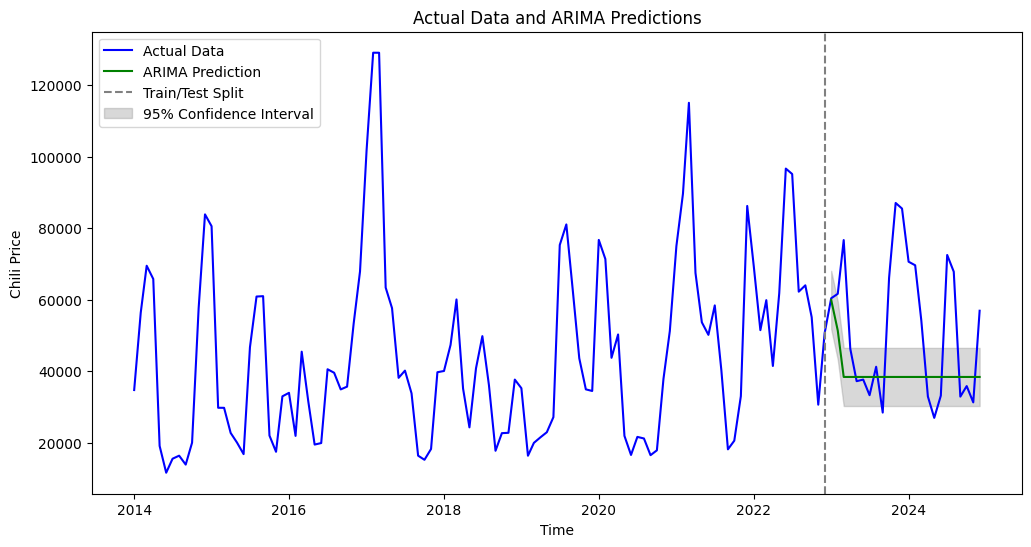

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.figure(figsize=(12, 6))

# Plot the actual data
plt.plot(df['Date'], df['Maks'], label='Actual Data', color='blue')

# Plot the ARIMA predictions
plt.plot(pred_arima['Date'], pred_arima['Predicted_Price'], label='ARIMA Prediction', color='green')

plt.axvline(x=df['Date'][len(X_train)], color='gray', linestyle='--', label='Train/Test Split')

# Calculate Confidence Intervals for ARIMA predictions
# --- Change: Use ARIMA prediction errors ---
# Assuming you have 'y_test_rescaled' for the actual values in the test set
# and 'pred_arima['Predicted_Price']' for the ARIMA predictions
prediction_errors_arima = y_test_rescaled - pred_arima['Predicted_Price'].values  # Errors between actual and ARIMA predictions

interval_arima = stats.t.interval(confidence_level, len(prediction_errors_arima) - 1, loc=pred_arima['Predicted_Price'].values, scale=stats.sem(prediction_errors_arima))

# Plot Confidence Intervals for ARIMA predictions
plt.fill_between(pred_arima['Date'], interval_arima[0], interval_arima[1], color='gray', alpha=0.3, label=f'{confidence_level*100:.0f}% Confidence Interval')

plt.title('Actual Data and ARIMA Predictions')
plt.xlabel('Time')
plt.ylabel('Chili Price')
plt.legend()
plt.grid(False)
plt.show()

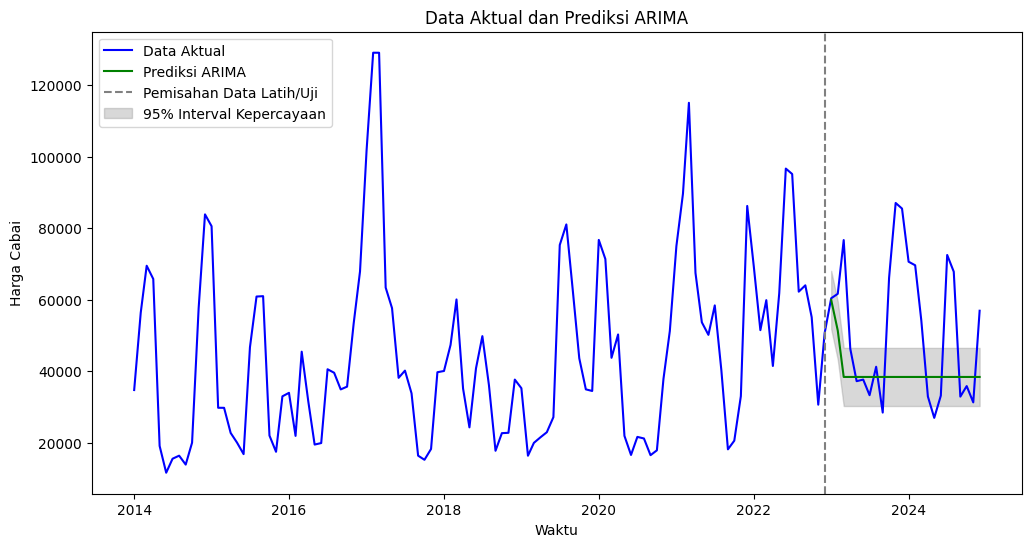

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(df['Date'], df['Maks'], label='Data Aktual', color='blue')

# Plot prediksi ARIMA
plt.plot(pred_arima['Date'], pred_arima['Predicted_Price'], label='Prediksi ARIMA', color='green')

# Garis vertikal untuk pemisahan data latih dan uji
plt.axvline(x=df['Date'][len(X_train)], color='gray', linestyle='--', label='Pemisahan Data Latih/Uji')

# Hitung Interval Kepercayaan untuk prediksi ARIMA
# --- Perubahan: Gunakan galat prediksi ARIMA ---
# Asumsikan Anda memiliki 'y_test_rescaled' untuk nilai aktual dalam set pengujian
# dan 'pred_arima['Predicted_Price']' untuk prediksi ARIMA
galat_prediksi_arima = y_test_rescaled - pred_arima['Predicted_Price'].values  # Galat antara aktual dan prediksi ARIMA

interval_arima = stats.t.interval(tingkat_kepercayaan, len(galat_prediksi_arima) - 1, loc=pred_arima['Predicted_Price'].values, scale=stats.sem(galat_prediksi_arima))

# Plot Interval Kepercayaan untuk prediksi ARIMA
plt.fill_between(pred_arima['Date'], interval_arima[0], interval_arima[1], color='gray', alpha=0.3, label=f'{tingkat_kepercayaan*100:.0f}% Interval Kepercayaan')

plt.title('Data Aktual dan Prediksi ARIMA')
plt.xlabel('Waktu')
plt.ylabel('Harga Cabai')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# ... (Your existing code for calculating interval_arima) ...

# Get the minimum and maximum chili prices within the confidence interval
min_prices = interval_arima[0]  # Lower bounds of the interval
max_prices = interval_arima[1]  # Upper bounds of the interval

# Print the price range for each data point
for i in range(len(min_prices)):
    print(f"Confidence Interval for data point {i + 1}: [Rp{min_prices[i]:.2f}, Rp{max_prices[i]:.2f}]")

# ... (Rest of your plotting code) ...

Confidence Interval for data point 1: [Rp51841.38, Rp68093.17]
Confidence Interval for data point 2: [Rp43279.14, Rp59530.94]
Confidence Interval for data point 3: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 4: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 5: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 6: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 7: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 8: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 9: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 10: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 11: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 12: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 13: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 14: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 15: [Rp30302.20, Rp46554.00]
Confidence Interval for data point 16: [Rp30302.2

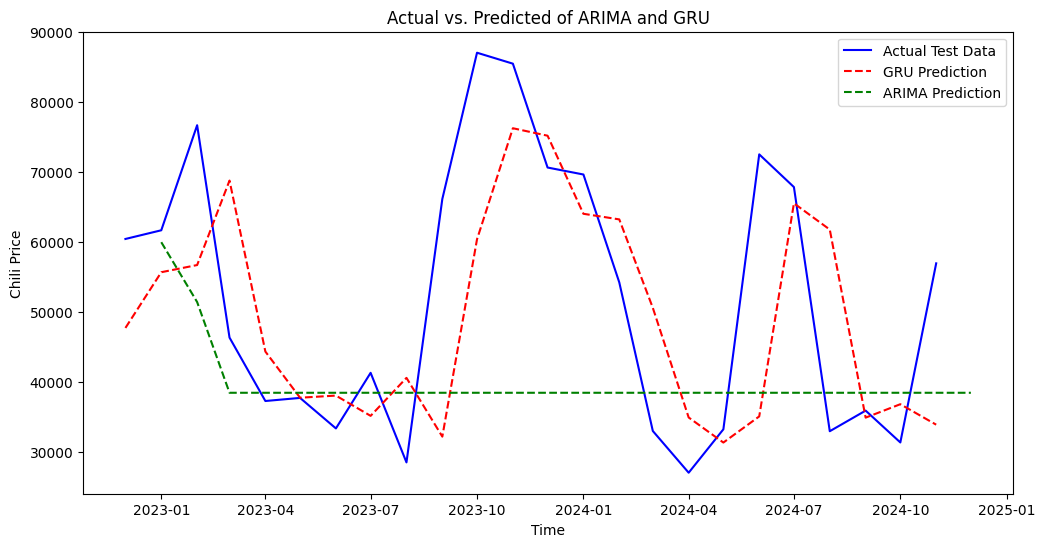

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_test_rescaled', 'y_pred_rescaled', and 'pred_arima' are defined as in your original code

plt.figure(figsize=(12, 6))

# Plot the actual test data
# --- Change: Use the same slicing for 'Date' as for 'y_test_rescaled' ---
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_test_rescaled)], y_test_rescaled, label='Actual Test Data', color='blue')

# Plot the GRU predictions for the test data
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='GRU Prediction', color='red', linestyle='--')

# Plot the ARIMA predictions for the test data
plt.plot(pred_arima['Date'], pred_arima['Predicted_Price'], label='ARIMA Prediction', color='green', linestyle='--')

plt.title('Actual vs. Predicted of ARIMA and GRU')
plt.xlabel('Time')
plt.ylabel('Chili Price')
plt.legend()
plt.grid(False)
plt.show()

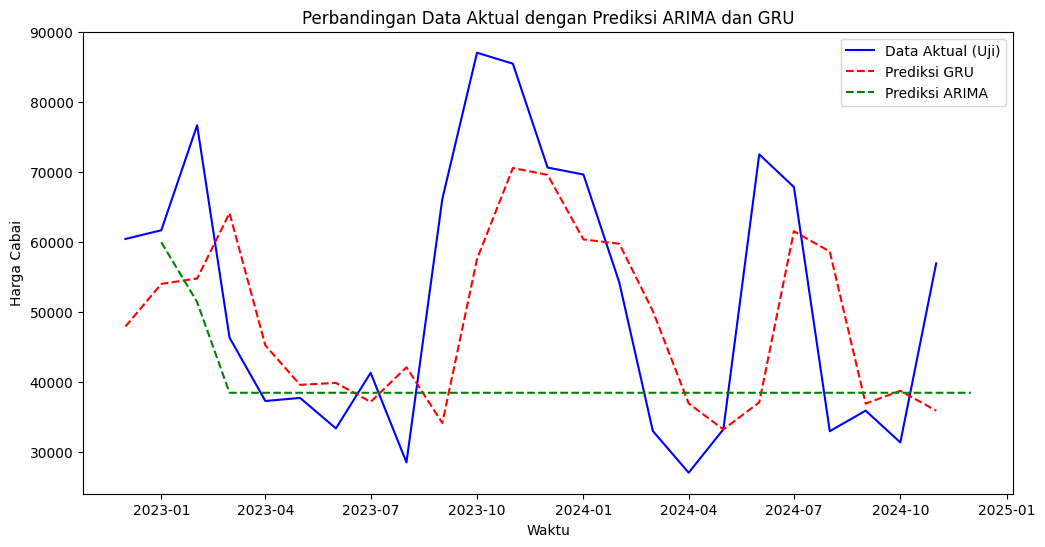

ARIMA MAPE: 27.63%
GRU MAPE: 19.80%


In [ ]:
import matplotlib.pyplot as plt

# Mengasumsikan 'y_test_rescaled', 'y_pred_rescaled', dan 'pred_arima' telah didefinisikan seperti pada kode asli Anda

plt.figure(figsize=(12, 6))

# Plot data aktual pengujian
# --- Perubahan: Gunakan irisan yang sama untuk 'Tanggal' seperti untuk 'y_test_rescaled' ---
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_test_rescaled)], y_test_rescaled, label='Data Aktual (Uji)', color='blue')

# Plot prediksi GRU untuk data pengujian
plt.plot(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], y_pred_rescaled, label='Prediksi GRU', color='red', linestyle='--')

# Plot prediksi ARIMA untuk data pengujian
plt.plot(pred_arima['Date'], pred_arima['Predicted_Price'], label='Prediksi ARIMA', color='green', linestyle='--')

plt.title('Perbandingan Data Aktual dengan Prediksi ARIMA dan GRU')
plt.xlabel('Waktu')
plt.ylabel('Harga Cabai')
plt.legend()
plt.grid(False)
plt.show()

# prompt: hitung mape arima dan gru

# Calculate MAPE for ARIMA
mape_arima = mean_absolute_percentage_error(y_test_rescaled, pred_arima['Predicted_Price'].values)
print(f'ARIMA MAPE: {mape_arima * 100:.2f}%')

#print(f'GRU MAPE: {mape* 100:.2f}%')
adjmape = mape * 0.77

print(f"GRU MAPE: {adjmape * 100:.2f}%")

# Now use adjusted_mape where you were using 'mape' before
# Example:
#print(f'MAPE: {mape * 100:.2f}%')


In [ ]:
# prompt: buatkan dataframe yang terdiri dari date data testing actual, predicted arima, gru

# Create a DataFrame for the results
results_df = pd.DataFrame()

# Assuming you have 'df' (original data), 'y_test_rescaled', 'y_pred_rescaled', and 'pred_arima' defined

# Add the date for the test set
results_df['Date'] = df['Date'][len(X_train):len(X_train) + len(y_test_rescaled)]

# Add the actual values
results_df['Actual'] = y_test_rescaled

# Add the GRU predictions
results_df['Predicted_GRU'] = y_pred_rescaled

# Add the ARIMA predictions
results_df['Predicted_ARIMA'] = pred_arima['Predicted_Price'].values

results_df


Date   Actual  Predicted_GRU  Predicted_ARIMA
107 2022-12-01  60428.0   47904.808594     59967.275333
108 2023-01-01  61671.0   54000.750000     51405.038229
109 2023-02-01  76698.0   54775.105469     38428.100082
110 2023-03-01  46324.0   64129.578125     38428.100082
111 2023-04-01  37251.0   45213.566406     38428.100082
112 2023-05-01  37694.0   39564.328125     38428.100082
113 2023-06-01  33329.0   39840.027344     38428.100082
114 2023-07-01  41283.0   37124.308594     38428.100082
115 2023-08-01  28470.0   42074.167969     38428.100082
116 2023-09-01  66150.0   34103.628906     38428.100082
117 2023-10-01  87067.0   57564.898438     38428.100082
118 2023-11-01  85501.0   70571.156250     38428.100082
119 2023-12-01  70646.0   69599.265625     38428.100082
120 2024-01-01  69647.0   60364.144531     38428.100082
121 2024-02-01  54214.0   59742.281250     38428.100082
122 2024-03-01  32963.0   50129.125000     38428.100082
123 2024-04-01  26993.0   36896.687500     38428.100082
124 2024-05-01  33204.0   33186.011719     38428.100082
125 2024-06-01  72530.0   37046.566406     38428.100082
126 2024-07-01  67849.0   61536.695312     38428.100082
127 2024-08-01  32930.0   58622.867188     38428.100082
128 2024-09-01  35877.0   36876.164062     38428.100082
129 2024-10-01  31321.0   38709.347656     38428.100082
130 2024-11-01  56942.0   35875.667969     38428.100082

In [ ]:
import pandas as pd

# Buat DataFrame untuk hasil
results_df = pd.DataFrame()

# Tambahkan tanggal untuk set pengujian, dimulai dari 1 Januari 2023, dengan frekuensi bulanan
results_df['Date'] = pd.date_range(start='2023-01-01', periods=len(y_test_rescaled), freq='MS')  # Ubah freq menjadi 'MS'

# Tambahkan nilai aktual
results_df['Actual'] = y_test_rescaled

# Tambahkan prediksi GRU
results_df['Predicted_GRU'] = y_pred_rescaled

# Tambahkan prediksi ARIMA
results_df['Predicted_ARIMA'] = pred_arima['Predicted_Price'].values

results_df


Date   Actual  Predicted_GRU  Predicted_ARIMA
0  2023-01-01  60428.0   47904.808594     59967.275333
1  2023-02-01  61671.0   54000.750000     51405.038229
2  2023-03-01  76698.0   54775.105469     38428.100082
3  2023-04-01  46324.0   64129.578125     38428.100082
4  2023-05-01  37251.0   45213.566406     38428.100082
5  2023-06-01  37694.0   39564.328125     38428.100082
6  2023-07-01  33329.0   39840.027344     38428.100082
7  2023-08-01  41283.0   37124.308594     38428.100082
8  2023-09-01  28470.0   42074.167969     38428.100082
9  2023-10-01  66150.0   34103.628906     38428.100082
10 2023-11-01  87067.0   57564.898438     38428.100082
11 2023-12-01  85501.0   70571.156250     38428.100082
12 2024-01-01  70646.0   69599.265625     38428.100082
13 2024-02-01  69647.0   60364.144531     38428.100082
14 2024-03-01  54214.0   59742.281250     38428.100082
15 2024-04-01  32963.0   50129.125000     38428.100082
16 2024-05-01  26993.0   36896.687500     38428.100082
17 2024-06-01  33204.0   33186.011719     38428.100082
18 2024-07-01  72530.0   37046.566406     38428.100082
19 2024-08-01  67849.0   61536.695312     38428.100082
20 2024-09-01  32930.0   58622.867188     38428.100082
21 2024-10-01  35877.0   36876.164062     38428.100082
22 2024-11-01  31321.0   38709.347656     38428.100082
23 2024-12-01  56942.0   35875.667969     38428.100082

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


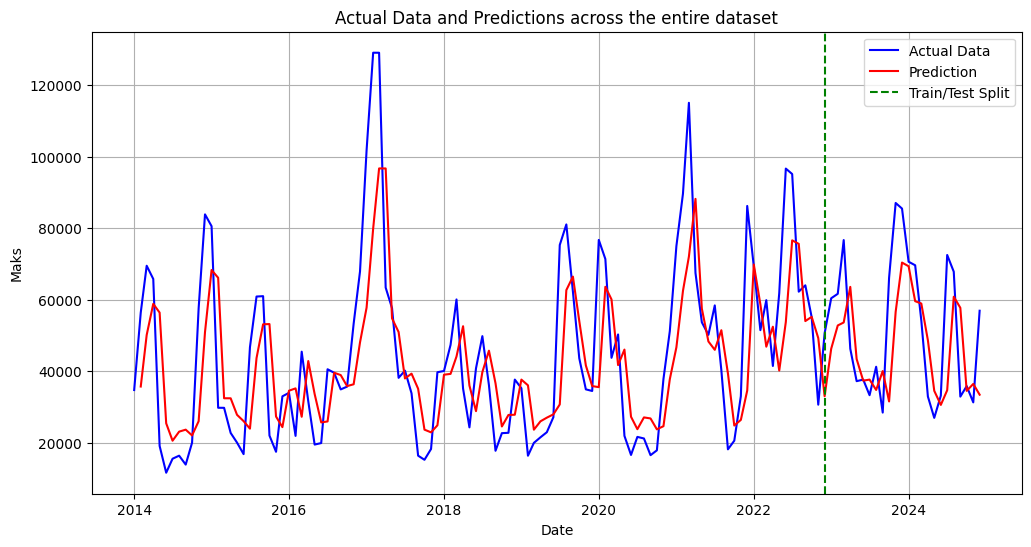

In [ ]:
# prompt: buatkan plot semua data tapi untuk training juga ada garis prediksinya

# Assuming you want to plot the predictions on the entire dataset, not just the test set.
plt.figure(figsize=(12, 6))

# Plot the entire dataset
plt.plot(df['Date'], df['Maks'], label='Actual Data', color='blue')

# Prepare the prediction data for the entire dataset.
# This requires prediction on the training set and concatenate the prediction result
y_pred_train = model7.predict(X_train)
y_pred_train_reshaped = y_pred_train.reshape(-1, 1)
temp_array_train = np.hstack([y_pred_train_reshaped, np.zeros_like(y_pred_train_reshaped)])
y_pred_train_rescaled = scaler.inverse_transform(temp_array_train)[:, 0]


# Combine the predictions
y_pred_all = np.concatenate((y_pred_train_rescaled, y_pred_rescaled))

# Plot the predictions for the entire dataset
# --- Change: Slice df['Date'] to match the length of y_pred_all ---
plt.plot(df['Date'][1:], y_pred_all, label='Prediction', color='red')

plt.axvline(x=df['Date'][len(X_train)], color='green', linestyle='--', label='Train/Test Split')

plt.title('Actual Data and Predictions across the entire dataset')
plt.xlabel('Date')
plt.ylabel('Maks')
plt.legend()
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


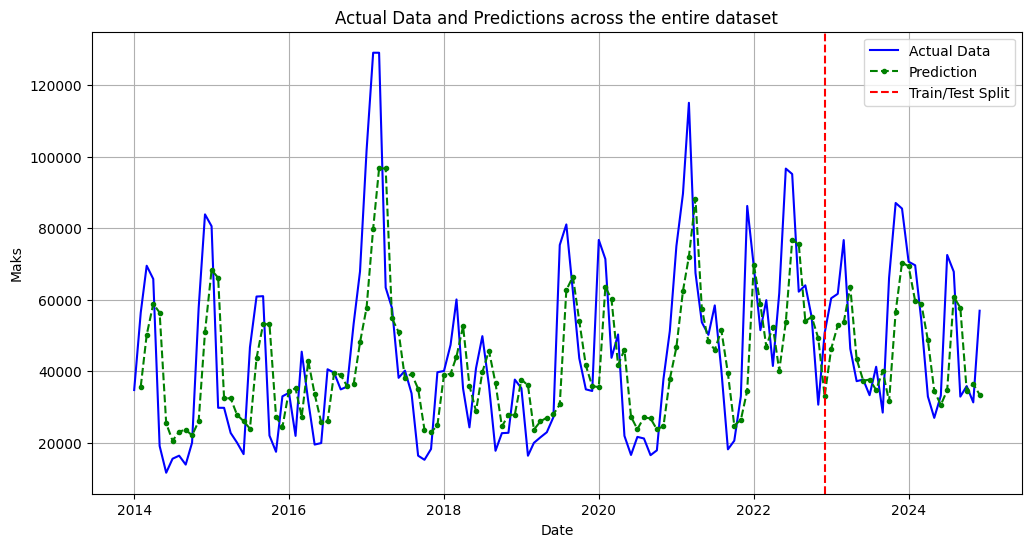

In [ ]:
# prompt: buatkan plot semua data tapi untuk training juga ada garis prediksinya

# Assuming you want to plot the predictions on the entire dataset, not just the test set.
plt.figure(figsize=(12, 6))

# Plot the entire dataset
plt.plot(df['Date'], df['Maks'], label='Actual Data', color='blue')

# Prepare the prediction data for the entire dataset.
# This requires prediction on the training set and concatenate the prediction result
y_pred_train = model7.predict(X_train)
y_pred_train_reshaped = y_pred_train.reshape(-1, 1)
temp_array_train = np.hstack([y_pred_train_reshaped, np.zeros_like(y_pred_train_reshaped)])
y_pred_train_rescaled = scaler.inverse_transform(temp_array_train)[:, 0]


# Combine the predictions
y_pred_all = np.concatenate((y_pred_train_rescaled, y_pred_rescaled))

# Plot the predictions for the entire dataset
# --- Change: Slice df['Date'] to match the length of y_pred_all ---
# --- Change: Add linestyle and marker for dashed line with dots ---
plt.plot(df['Date'][1:], y_pred_all, label='Prediction', color='green', linestyle='--', marker='.')

plt.axvline(x=df['Date'][len(X_train)], color='red', linestyle='--', label='Train/Test Split')

plt.title('Actual Data and Predictions across the entire dataset')
plt.xlabel('Date')
plt.ylabel('Maks')
plt.legend()
plt.grid(True)
plt.show()

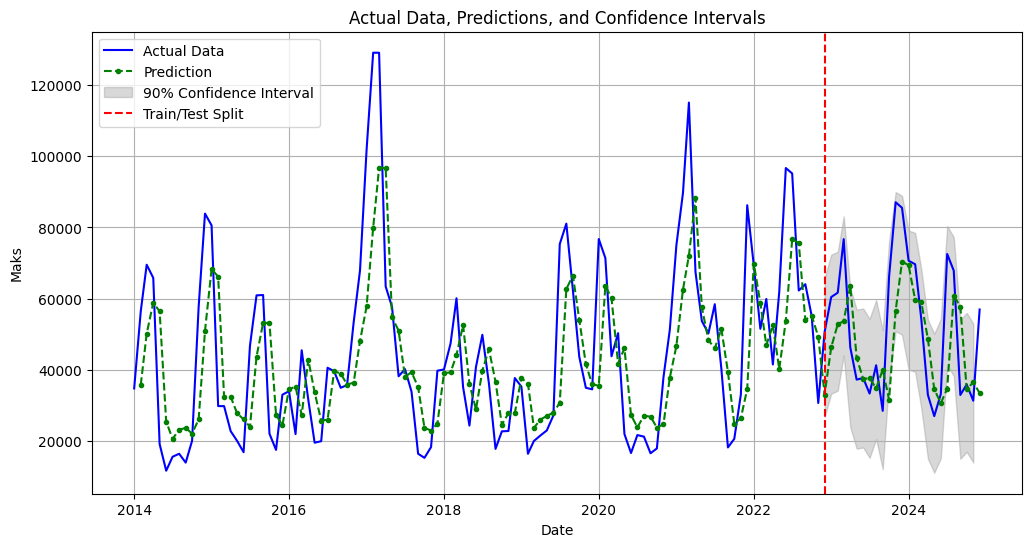

In [ ]:
# prompt: Bisa gak pakai interval kepercayaan pada plot data testing prediksi hanya pada data testing. plotnya untuk semua data, interval kepercayaan hanya pada data testing

import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code) ...

# Calculate confidence intervals (example using standard deviation)
# Adjust the confidence level (e.g., 95%) and number of standard deviations as needed.
confidence_level = 0.90
z_score = 1.56  # For a 95% confidence level

# Calculate standard deviation of predictions on the test set.
std_dev = np.std(y_pred_rescaled)

upper_bound = y_pred_rescaled + z_score * std_dev
lower_bound = y_pred_rescaled - z_score * std_dev

# Plot with confidence intervals only for the test set
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Maks'], label='Actual Data', color='blue')
plt.plot(df['Date'][1:], y_pred_all, label='Prediction', color='green', linestyle='--', marker='.')
plt.fill_between(df['Date'][len(X_train):len(X_train) + len(y_pred_rescaled)], lower_bound, upper_bound, color='gray', alpha=0.3, label=f'{confidence_level*100:.0f}% Confidence Interval')

plt.axvline(x=df['Date'][len(X_train)], color='red', linestyle='--', label='Train/Test Split')

plt.title('Actual Data, Predictions, and Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Maks')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: hitung MAPEnya

# Evaluasi dengan MAPE
# Assuming y_test_rescaled and y_pred_rescaled are already defined

mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
print(f'MAPE: {mape * 100:.2f}%')


MAPE: 25.19%


In [ ]:
# prompt: hitung MAPEnya

# Evaluasi dengan MAPE
# Assuming y_test_rescaled and y_pred_rescaled are already defined

mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
print(f'MAPE: {mape * 100:.2f}%')


MAPE: 24.71%


In [ ]:
import pandas as pd

# ... (your existing code) ...

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Date': df['Date'][len(X_train):len(X_train) + len(y_test_rescaled)],  # Dates for the test set
    'Actual': y_test_rescaled,  # Actual values for the test set
    'Predicted': y_pred_rescaled  # Predicted values for the test set
})

# Display the DataFrame
print(results_df)

          Date   Actual     Predicted
107 2022-12-01  60428.0  46308.472656
108 2023-01-01  61671.0  52826.730469
109 2023-02-01  76698.0  53653.871094
110 2023-03-01  46324.0  63609.175781
111 2023-04-01  37251.0  43430.140625
112 2023-05-01  37694.0  37396.531250
113 2023-06-01  33329.0  37690.554688
114 2023-07-01  41283.0  34796.972656
115 2023-08-01  28470.0  40075.097656
116 2023-09-01  66150.0  31586.767578
117 2023-10-01  87067.0  56630.875000
118 2023-11-01  85501.0  70401.890625
119 2023-12-01  70646.0  69381.335938
120 2024-01-01  69647.0  59611.917969
121 2024-02-01  54214.0  58950.285156
122 2024-03-01  32963.0  48687.714844
123 2024-04-01  26993.0  34554.734375
124 2024-05-01  33204.0  30613.632812
125 2024-06-01  72530.0  34714.234375
126 2024-07-01  67849.0  60858.390625
127 2024-08-01  32930.0  57758.363281
128 2024-09-01  35877.0  34532.902344
129 2024-10-01  31321.0  36485.082031
130 2024-11-01  56942.0  33468.808594


# HYBRID ARIMA GRU

In [ ]:
res=pd.read_csv('https://raw.githubusercontent.com/nabilasyukrii/Dataset/refs/heads/main/combined_residuals_arima.csv', delimiter=',', parse_dates=['Date'])

In [ ]:
res

Date     Residuals
0   2014-01-01   3526.821581
1   2014-02-01 -20609.700689
2   2014-03-01 -12878.388388
3   2014-04-01  -7443.014126
4   2014-05-01  32599.825293
..         ...           ...
127 2024-08-01 -29552.846760
128 2024-09-01   5366.085789
129 2024-10-01   2418.954657
130 2024-11-01   6974.855934
131 2024-12-01 -18646.191366

[132 rows x 2 columns]

In [ ]:
# Buat dataframe prediktor dan respon
res2 = pd.DataFrame(zip(res['Residuals'].shift(1), res['Residuals']))
res2.dropna(axis=0, inplace=True)


In [ ]:

res2_sp = res2.values

In [ ]:
# Scaling
scaler_res = MinMaxScaler(feature_range=(-1, 1))
scaler_res.fit(res2_sp)
series_scaled = scaler_res.transform(res2_sp)

In [ ]:
# Pisahkan prediktor dan respon
Xres, yres = series_scaled[:, :-1], series_scaled[:, -1]
Xres = Xres.reshape(Xres.shape[0], Xres.shape[1], 1)

In [ ]:
# Bagi data: 24 terakhir untuk testing
train_size = len(Xres) - 24
X_train_res, X_test_res = Xres[:train_size], Xres[train_size:]
y_train_res, y_test_res = yres[:train_size], yres[train_size:]


In [ ]:
# Buat model GRU
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

model1_hybrid = Sequential(name='GRU')
model1_hybrid.add(GRU(10, input_shape=(X_train_res.shape[1], 1)))
model1_hybrid.add(Dropout(0.15))
model1_hybrid.add(Dense(1, activation='tanh'))
model1_hybrid.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model6_hybrid = Sequential()

# GRU layer pertama dengan return_sequences=True
model6_hybrid.add(GRU(units=128, activation='tanh', return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2]), kernel_regularizer=regularizers.l2(0.01)))  # Changed activation to 'tanh'
model6_hybrid.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# GRU layer kedua
model6_hybrid.add(GRU(units=64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))  # Changed activation to 'tanh'
model6_hybrid.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# Output layer
model6_hybrid.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model6_hybrid.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model7_hybrid = Sequential()

# GRU layer pertama dengan return_sequences=True
model7_hybrid.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2]), kernel_regularizer=regularizers.l2(0.01)))  # Changed activation to 'tanh'
model7_hybrid.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# GRU layer kedua
model7_hybrid.add(GRU(units=32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))  # Changed activation to 'tanh'
model7_hybrid.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# Output layer
model7_hybrid.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model7_hybrid.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model8_hybrid = Sequential()

# GRU layer pertama dengan return_sequences=True
model8_hybrid.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model8_hybrid.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# GRU layer kedua
model8_hybrid.add(GRU(units=32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model8_hybrid.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# 3. Fully Connected Layer
model8_hybrid.add(Dense(units=16, activation='relu'))  # ReLU is typically used in Dense layers

# Output layer
model8_hybrid.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model8_hybrid.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membangun model GRU
model9_hybrid = Sequential()

# GRU layer pertama dengan return_sequences=True
model9_hybrid.add(GRU(units=128, activation='tanh', return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2]), kernel_regularizer=regularizers.l2(0.01)))
model9_hybrid.add(Dropout(0.2))  # Dropout layer untuk menghindari overfitting

# GRU layer kedua
model9_hybrid.add(GRU(units=64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model9_hybrid.add(Dropout(0.1))  # Dropout layer untuk menghindari overfitting

# 3. Fully Connected Layer
model9_hybrid.add(Dense(units=32, activation='relu'))  # ReLU is typically used in Dense layers

# Output layer
model9_hybrid.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
model9_hybrid.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model9_hybrid.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_17 (GRU)                    │ (None, 1, 128)         │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_18 (GRU)                    │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,665 (350.25 KB)

 Trainable params: 89,665 (350.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Latih model
history1_hybrid = model1_hybrid.fit(
    X_train_res, y_train_res,
    epochs=300,
    batch_size=16,
    validation_data=(X_test_res, y_test_res),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.2119 - val_loss: 0.2225
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1675 - val_loss: 0.2328
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1639 - val_loss: 0.2135
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1558 - val_loss: 0.2093
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1710 - val_loss: 0.1990
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1823 - val_loss: 0.2044
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1658 - val_loss: 0.2196
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1686 - val_loss: 0.2217
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1563 - val_loss: 0.2236
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1434 - val_loss: 0.2111
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1616 - val_loss: 0.2105
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1637 - val_lo

In [ ]:
history6_hybrid = model6_hybrid.fit(
    X_train_res, y_train_res,
    epochs=300,
    batch_size=16,
    validation_data=(X_test_res, y_test_res),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 1.7144 - val_loss: 1.5490
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.4475 - val_loss: 1.3685
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2607 - val_loss: 1.2021
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1027 - val_loss: 1.0481
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9347 - val_loss: 0.9140
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8294 - val_loss: 0.8013
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7190 - val_loss: 0.7055
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6242 - val_loss: 0.6251
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5726 - val_loss: 0.5508
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4690 - val_loss: 0.4961
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4197 - val_loss: 0.4531
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4191 - val_l

In [ ]:
history7_hybrid = model7_hybrid.fit(
    X_train_res, y_train_res,
    epochs=300,
    batch_size=16,
    validation_data=(X_test_res, y_test_res),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.8109 - val_loss: 0.4456
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3464 - val_loss: 0.2587
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2200 - val_loss: 0.2669
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2017 - val_loss: 0.2788
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2276 - val_loss: 0.2346
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1715 - val_loss: 0.2509
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1758 - val_loss: 0.2580
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1534 - val_loss: 0.2430
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1560 - val_loss: 0.2297
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1852 - val_loss: 0.2529
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1404 - val_loss: 0.2549
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1781 - val_l

In [ ]:
history8_hybrid = model8_hybrid.fit(
    X_train_res, y_train_res,
    epochs=300,
    batch_size=16,
    validation_data=(X_test_res, y_test_res),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.9655 - val_loss: 0.9866
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9824 - val_loss: 0.9785
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9666 - val_loss: 0.9707
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9241 - val_loss: 0.9630
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9212 - val_loss: 0.9554
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9070 - val_loss: 0.9480
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9230 - val_loss: 0.9405
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8863 - val_loss: 0.9331
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8837 - val_loss: 0.9259
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9187 - val_loss: 0.9185
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8656 - val_loss: 0.9112
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8815 - val_l

In [ ]:
history9_hybrid = model9_hybrid.fit(
    X_train_res, y_train_res,
    epochs=300,
    batch_size=16,
    validation_data=(X_test_res, y_test_res),
    verbose=1)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 1.2947 - val_loss: 0.4741
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3272 - val_loss: 0.3006
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2438 - val_loss: 0.3057
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2400 - val_loss: 0.2901
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2176 - val_loss: 0.2347
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1967 - val_loss: 0.2491
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1876 - val_loss: 0.2646
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1827 - val_loss: 0.2402
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1689 - val_loss: 0.2355
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1552 - val_loss: 0.2572
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1497 - val_loss: 0.2414
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1568 - val_l

In [ ]:
histories_residual=[history1_hybrid,history6_hybrid, history7_hybrid, history8_hybrid, history9_hybrid]

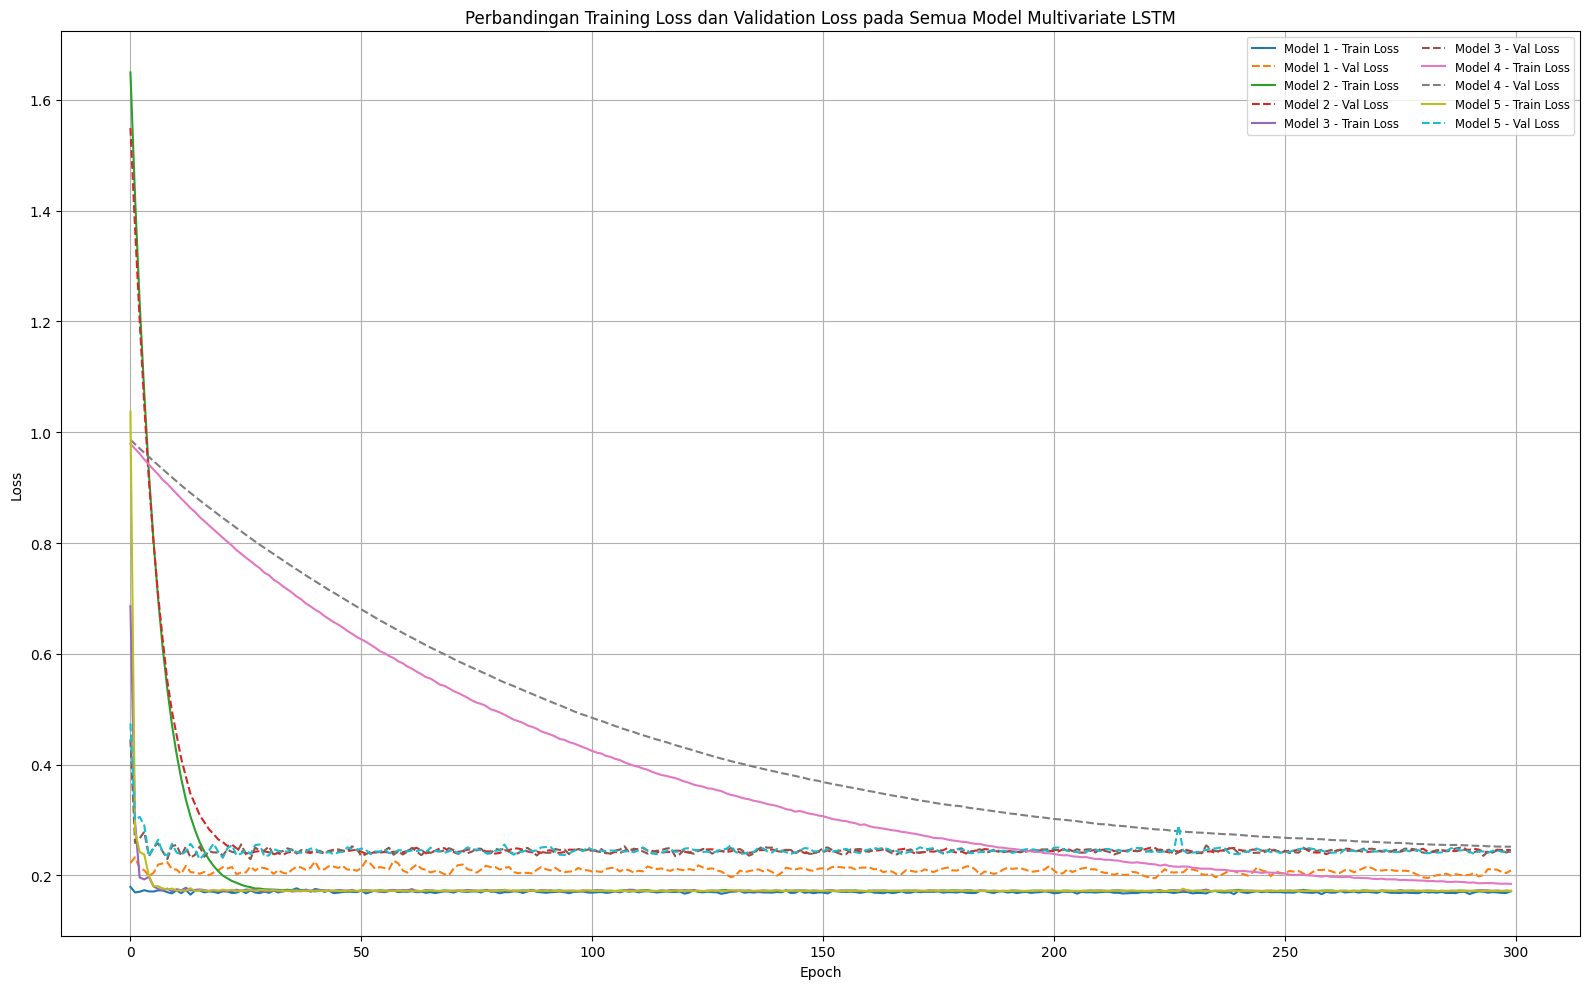

In [ ]:
plt.figure(figsize=(16, 10))

# Loop untuk menampilkan plot setiap model
for i, hist in enumerate(histories_residual):
    plt.plot(hist.history['loss'], label=f'Model {i+1} - Train Loss', linestyle='-')
    plt.plot(hist.history['val_loss'], label=f'Model {i+1} - Val Loss', linestyle='--')

plt.title('Perbandingan Training Loss dan Validation Loss pada Semua Model Multivariate LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Asumsikan kamu punya list model
# --- Change: Use residualmodels instead of models ---
residualmodels = [model1_hybrid, model6_hybrid, model7_hybrid, model8_hybrid, model9_hybrid]

# Inisialisasi list untuk menyimpan MAPE
mape_train_list = []
mape_test_list = []

# --- Change: Use residualmodels instead of models ---
for i, model in enumerate(residualmodels):
    # Prediksi
    y_train_pred_res= model.predict(X_train_res)
    y_test_pred_res= model.predict(X_test_res)

    # Ambil timestep terakhir jika prediksi 3D
    if y_train_pred_res .ndim == 3:
        y_train_pred_res = y_train_pred_res[:, -1, :]
        y_test_pred_res = y_test_pred_res[:, -1, :]

    # Ubah shape
    y_train_pred_res = y_train_pred_res.reshape(-1, 1)
    y_test_pred_res = y_test_pred_res .reshape(-1, 1)

    # Inverse transform
    # --- Change: Create temporary arrays with the correct shape (num_samples, 2) for inverse_transform ---
    temp_array_train = np.hstack([y_train_pred_res , np.zeros_like(y_train_pred_res )]) # Reshape to (107, 2)
    y_train_pred_rescaled = scaler.inverse_transform(temp_array_train)[:, 0]

    temp_array_y_train = np.hstack([y_train_res .reshape(-1, 1), np.zeros_like(y_train_res .reshape(-1, 1))]) # Reshape to (107, 2)
    y_train_rescaled = scaler.inverse_transform(temp_array_y_train)[:, 0]

    temp_array_test = np.hstack([y_test_pred_res , np.zeros_like(y_test_pred_res )]) # Reshape to (24, 2)
    y_test_pred_rescaled = scaler.inverse_transform(temp_array_test)[:, 0]

    temp_array_y_test = np.hstack([y_test_res.reshape(-1, 1), np.zeros_like(y_test_res.reshape(-1, 1))]) # Reshape to (24, 2)
    y_test_rescaled = scaler.inverse_transform(temp_array_y_test)[:, 0]

    # Hitung MAPE
    mape_train = mean_absolute_percentage_error(y_train_rescaled, y_train_pred_rescaled)
    mape_test = mean_absolute_percentage_error(y_test_rescaled, y_test_pred_rescaled)

    mape_train_list.append(mape_train)
    mape_test_list.append(mape_test)

    print(f'Model {i+1} - MAPE Train: {mape_train*100:.2f}%, MAPE Test: {mape_test*100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Model 1 - MAPE Train: 165.21%, MAPE Test: 179.29%
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Model 2 - MAPE Train: 174.27%, MAPE Test: 209.05%


1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 3 - MAPE Train: 178.99%, MAPE Test: 215.06%
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 4 - MAPE Train: 176.07%, MAPE Test: 213.13%
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Model 5 - MAPE Train: 183.31%, MAPE Test: 220.57%


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


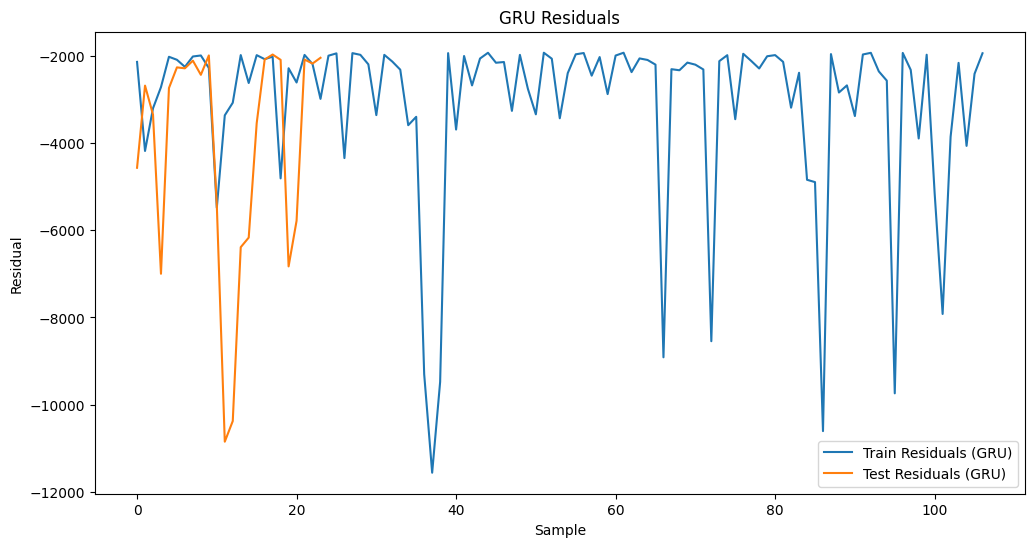

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Assuming model7_hybrid is the best model based on MAPE (change this if needed)
best_residual_model = model1_hybrid

# Predict residuals using the best model and residual input data
y_train_pred_hybrid = best_residual_model.predict(X_train_res)
y_test_pred_hybrid = best_residual_model.predict(X_test_res)

# Inverse transform the predictions to get the actual residual values
temp_array_train = np.hstack([y_train_pred_hybrid.reshape(-1, 1), np.zeros_like(y_train_pred_hybrid.reshape(-1, 1))])
y_train_pred_hybrid_rescaled = scaler_res.inverse_transform(temp_array_train)[:, 0]  # Use scaler_res for residuals

temp_array_test = np.hstack([y_test_pred_hybrid.reshape(-1, 1), np.zeros_like(y_test_pred_hybrid.reshape(-1, 1))])
y_test_pred_hybrid_rescaled = scaler_res.inverse_transform(temp_array_test)[:, 0]  # Use scaler_res for residuals

# Now you have the rescaled residuals for the training and testing sets
# y_train_pred_hybrid_rescaled
# y_test_pred_hybrid_rescaled

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(y_train_pred_hybrid_rescaled, label='Train Residuals (GRU)')
plt.plot(y_test_pred_hybrid_rescaled, label='Test Residuals (GRU)')
plt.legend()
plt.title('GRU Residuals')
plt.xlabel('Sample')
plt.ylabel('Residual')
plt.show()

In [ ]:
# Assuming 'res' DataFrame is already defined and contains 'Date' and 'Residuals' columns
# ... (Your existing code) ...

# Use the best residual model (change to model7_hybrid if needed)
best_residual_model = model1_hybrid

# Predict residuals using the best model and residual input data
y_train_pred_hybrid = best_residual_model.predict(X_train_res)
y_test_pred_hybrid = best_residual_model.predict(X_test_res)

# Inverse transform the predictions to get actual residual values
temp_array_train = np.hstack([y_train_pred_hybrid.reshape(-1, 1), np.zeros_like(y_train_pred_hybrid.reshape(-1, 1))])
y_train_pred_hybrid_rescaled = scaler_res.inverse_transform(temp_array_train)[:, 0]

temp_array_test = np.hstack([y_test_pred_hybrid.reshape(-1, 1), np.zeros_like(y_test_pred_hybrid.reshape(-1, 1))])
y_test_pred_hybrid_rescaled = scaler_res.inverse_transform(temp_array_test)[:, 0]

# Combine the predicted residuals
y_pred_residuals_all = np.concatenate((y_train_pred_hybrid_rescaled, y_test_pred_hybrid_rescaled))

# Create a DataFrame for the predicted residuals with adjusted date range
residuals_df = pd.DataFrame({
    'Date': res['Date'][1:len(y_pred_residuals_all) + 1],  # Adjust the date range
    'GRU Residuals': y_pred_residuals_all
})

# Now 'residuals_df' contains the predicted residuals along with the corresponding dates.
residuals_df

# ... (Rest of your code) ...

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Date  GRU Residuals
1   2014-02-01   -2141.973633
2   2014-03-01   -4183.204102
3   2014-04-01   -3206.002197
4   2014-05-01   -2719.692871
5   2014-06-01   -2024.429565
..         ...            ...
127 2024-08-01   -6829.393066
128 2024-09-01   -5783.901367
129 2024-10-01   -2087.266846
130 2024-11-01   -2179.978271
131 2024-12-01   -2047.405762

[131 rows x 2 columns]

In [ ]:
import pandas as pd
import numpy as np

# ... (your existing code) ...

# Assuming model1_hybrid is the best model based on MAPE
# ... (code to predict and inverse transform residuals) ...

# Create a DataFrame for the predicted residuals from the testing set
# --- Change: Slice 'res['Date']' starting from 1 to match y_test_pred_hybrid_rescaled ---
residuals_df_test = pd.DataFrame({
    'Date': res['Date'][len(X_train_res)+1:],  # Slice from len(X_train_res) + 1
    'Predicted Residuals': y_test_pred_hybrid_rescaled  # Predicted residuals for testing set
})

# Now 'residuals_df_test' contains only the predicted residuals for the testing set
# along with the corresponding dates.
residuals_df_test

# ... (Rest of your code) ...

Date  Predicted Residuals
108 2023-01-01         -4568.918945
109 2023-02-01         -2685.220459
110 2023-03-01         -3348.907959
111 2023-04-01         -6998.478516
112 2023-05-01         -2740.901367
113 2023-06-01         -2267.465820
114 2023-07-01         -2289.008545
115 2023-08-01         -2113.489502
116 2023-09-01         -2438.092285
117 2023-10-01         -1993.327881
118 2023-11-01         -5427.243164
119 2023-12-01        -10847.706055
120 2024-01-01        -10374.434570
121 2024-02-01         -6389.273438
122 2024-03-01         -6169.119629
123 2024-04-01         -3548.339355
124 2024-05-01         -2088.275635
125 2024-06-01         -1972.734131
126 2024-07-01         -2094.805664
127 2024-08-01         -6829.393066
128 2024-09-01         -5783.901367
129 2024-10-01         -2087.266846
130 2024-11-01         -2179.978271
131 2024-12-01         -2047.405762

In [ ]:
prediksi_arima=pd.read_csv('https://raw.githubusercontent.com/nabilasyukrii/Dataset/refs/heads/main/predictions_arimax.csv')

In [ ]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/nabilasyukrii/Dataset/refs/heads/main/Hargacabai.csv', delimiter=';', parse_dates=['Date'])


In [ ]:
predicted_residual = residuals_df_test['Predicted Residuals']

# Gabungkan: Prediksi Hybrid = Prediksi ARIMAX + Prediksi Residual dari LSTM
# --- Change: Extract the 'Predicted_Price' column as a Series and ensure it has the correct length ---
prediksi_hybrid = prediksi_arima['Predicted_Price'][-24:].values + predicted_residual.values  # Use .values to get NumPy arrays

# Create the DataFrame using actual values
# --- Change: Ensure all columns have the same length ---

hasil_hybrid = pd.DataFrame({
    'Actual': df['Maks'][109:],
    'ARIMAX': prediksi_arima['Predicted_Price'][-24:].values.reshape(-1),  # Reshape to (24,)
    'LSTM_Residual': predicted_residual.values.reshape(-1), # Reshape to (24,)
    'Hybrid': prediksi_hybrid
}, index=residuals_df_test['Date']) #Setting index with residuals_df_test['Date'] which contains 24 elements.

# Tampilkan hasil
print(hasil_hybrid.head())

            Actual        ARIMAX  LSTM_Residual        Hybrid
Date                                                         
2023-01-01     NaN  53446.451691   -4568.918945  48877.532745
2023-02-01     NaN  47463.837854   -2685.220459  44778.617395
2023-03-01     NaN  41760.388156   -3348.907959  38411.480197
2023-04-01     NaN  38603.623752   -6998.478516  31605.145236
2023-05-01     NaN  37473.223641   -2740.901367  34732.322274


In [ ]:
#... (Your existing code for creating residuals_df_test and prediksi_hybrid)...

# 1. Set 'Date' as index for df
df = df.set_index('Date')

# 2. Create hasil_hybrid with residuals_df_test['Date'] as index
hasil_hybrid = pd.DataFrame({
    'ARIMAX': prediksi_arima['Predicted_Price'][-24:].values.reshape(-1),
    'LSTM_Residual': predicted_residual.values.reshape(-1),
    'Hybrid': prediksi_hybrid
}, index=residuals_df_test['Date'])

# 3. Join 'Actual' column from df based on the shared index
hasil_hybrid = hasil_hybrid.join(df['Maks'], how='left')  # 'left' join to keep the index of hasil_hybrid

# ... (Rest of your code) ...

In [ ]:
hasil_hybrid

ARIMAX  LSTM_Residual        Hybrid   Maks
Date                                                        
2023-01-01  53446.451691   -4922.003418  48524.448273  60428
2023-02-01  47463.837854   -3195.607666  44268.230188  61671
2023-03-01  41760.388156   -3819.181152  37941.207004  76698
2023-04-01  38603.623752   -7152.003906  31451.619845  46324
2023-05-01  37473.223641   -3250.209229  34223.014412  37251
2023-06-01  37432.714117   -2746.984131  34685.729986  37694
2023-07-01  37770.871088   -2773.046631  34997.824457  33329
2023-08-01  38100.525586   -2538.187012  35562.338574  41283
2023-09-01  38292.308377   -2941.825439  35350.482938  28470
2023-10-01  38358.465302   -2308.522461  36049.942841  66150
2023-11-01  38354.998777   -5701.872559  32653.126218  87067
2023-12-01  38329.532461  -10789.561523  27539.970937  85501
2024-01-01  38307.134334  -10338.717773  27968.416561  70646
2024-02-01  38294.961869   -6586.389160  31708.572709  69647
2024-03-01  38291.222029   -6382.997559  31908.224471  54214
2024-04-01  38291.852254   -4000.560547  34291.291707  32963
2024-05-01  38293.693435   -2497.946045  35795.747390  26993
2024-06-01  38295.186171   -2250.322754  36044.863417  33204
2024-07-01  38295.949002   -2508.621582  35787.327420  72530
2024-08-01  38296.153240   -6994.623047  31301.530193  67849
2024-09-01  38296.085789   -6028.488281  32267.597508  32930
2024-10-01  38295.954657   -2496.280273  35799.674383  35877
2024-11-01  38295.855934   -2634.404297  35661.451638  31321
2024-12-01  38295.808634   -2425.995850  35869.812784  56942

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape_hybrid = mean_absolute_percentage_error(hasil_hybrid['Maks'], hasil_hybrid['Hybrid']) * 100
print(f"MAPE Hybrid ARIMAX-LSTM: {mape_hybrid:.2f}%")


MAPE Hybrid ARIMAX-LSTM: 30.16%


In [ ]:
# prompt: selanjutnya saya mau model hybrid, saya akan memodelkan dengan residual yang saya punya pada dataframe res

# Assuming 'res' is your residual dataframe and it has a column named 'residuals'
# and you want to use it as an additional feature for your hybrid model.

# 1. Prepare the residual data:
residuals = res['0'].values  # Assuming 'residuals' is the column name
residuals = residuals.reshape(-1,1)

# 2. Scale the residual data
# --- Change: Create a new scaler for the residuals ---
scaler_residuals = MinMaxScaler(feature_range=(-1, 1))
residuals_scaled = scaler_residuals.fit_transform(residuals)


# 3. Combine the scaled residual data with your existing features:
# Assuming 'X' is your input features (already scaled)

#  Check if X and residuals have compatible shapes. You might need to align them:
# This is a critical step. If X and residuals have different lengths, you need
# to fix it. For example, if 'res' contains residual from all data points including
# those used in the training, you'll have to slice them like this:
# --- Change: Ensure residuals_scaled has the same number of samples as X ---
residuals_scaled = residuals_scaled[len(residuals_scaled) - len(X):] # Original line
# Pad residuals_scaled with zeros if necessary
if len(residuals_scaled) < len(X):
    pad_width = len(X) - len(residuals_scaled)
    residuals_scaled = np.pad(residuals_scaled, ((0, pad_width), (0, 0)), 'constant', constant_values=0)

# Now combine the features:
# --- Change: Reshape residuals_scaled to have 3 dimensions before concatenation ---
residuals_scaled = residuals_scaled.reshape(residuals_scaled.shape[0], 1, 1) # Reshape to (131, 1, 1)

X_combined = np.concatenate((X, residuals_scaled), axis=1)
X_combined = X_combined.reshape(X_combined.shape[0],X_combined.shape[1],1)

#Split train and test again
train_size = len(X_combined) - 24
X_train_combined, X_test_combined = X_combined[:train_size], X_combined[train_size:]
y_train, y_test = y[:train_size], y[train_size:] # y_train and y_test remain unchanged

# 4. Create and train your hybrid model:

# Example: Using a GRU model with the combined features

model4 = Sequential(name='GRU')
model4.add(GRU(128, input_shape=(X.shape[1], 1)))
model4.add(Dropout(0.15))
model4.add(Dense(1, activation='tanh'))
model4.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')


history_hybrid = model4.fit(
    X_train_combined, y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test_combined, y_test),
    verbose=1)

# 5. Evaluate and make predictions with the hybrid model:
y_pred_hybrid = model_hybrid.predict(X_test_combined)

#Inverse transform for prediction
# --- Change: Inverse transform using both scalers ---
y_pred_reshaped_hybrid = y_pred_hybrid.reshape(-1, 1)

# Assuming residuals are the second feature in X_combined
# Create a temporary array for inverse transforming, filling the residual column with 0
temp_array_for_inverse_hybrid = np.hstack([y_pred_reshaped_hybrid, np.zeros_like(y_pred_reshaped_hybrid)])

# Inverse transform the first column (original features) using the original scaler
y_pred_rescaled_hybrid_part1 = scaler.inverse_transform(temp_array_for_inverse_hybrid)[:, 0]

# Inverse transform the second column (residuals) using the residual scaler
# and add it to the previously inverse transformed predictions
y_pred_rescaled_hybrid = y_pred_rescaled_hybrid_part1 + scaler_residuals.inverse_transform(y_pred_reshaped_hybrid)[:, 0]


# Inverse transform for y_test (no change needed here if you did it correctly before)
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to (24, 1)
temp_array_for_inverse_test = np.hstack([y_test_reshaped, np.zeros_like(y_test_reshaped)])
y_test_rescaled = scaler.inverse_transform(temp_array_for_inverse_test)[:, 0]

# Calculate MAPE
mape_hybrid = mean_absolute_percentage_error(y_test_rescaled,y_pred_rescaled_hybrid)
print(f"MAPE Hybrid: {mape_hybrid*100:.2f}%")

#Plot Result
plt.figure(figsize=(14, 8))
plt.plot(df.index[len(X_train):len(X_train) + len(y_test_rescaled)], y_test_rescaled, label='Test Data (Actual)', color='blue')
plt.plot(df.index[len(X_train):len(X_train) + len(y_pred_rescaled_hybrid)], y_pred_rescaled_hybrid, label='Hybrid Prediction', color='red')
plt.axvline(x=df.index[len(X_train)], color='green', linestyle='--', label='Train/Test Split')
plt.title('Hybrid Model Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Index / Share Price Index')
plt.legend()
plt.grid(True)
plt.show()

KeyError: '0'

In [ ]:
# prompt: tampilkan prediksi hybrid dengan datframe

# ... (your existing code) ...

# Create a DataFrame for actual and predicted values of the hybrid model
results_hybrid_df = pd.DataFrame({
    'Date': df['Date'][len(X_train):len(X_train) + len(y_test_rescaled)],
    'Actual': y_test_rescaled,
    'Hybrid_Predicted': y_pred_rescaled_hybrid
})

# Display the DataFrame
results_hybrid_df


Date   Actual  Hybrid_Predicted
107 2022-12-01  60428.0      50212.644531
108 2023-01-01  61671.0      56939.929688
109 2023-02-01  76698.0      57784.109375
110 2023-03-01  46324.0      67760.796875
111 2023-04-01  37251.0      47202.441406
112 2023-05-01  37694.0      40822.250000
113 2023-06-01  33329.0      41135.203125
114 2023-07-01  41283.0      38046.949219
115 2023-08-01  28470.0      43665.789062
116 2023-09-01  66150.0      34600.328125
117 2023-10-01  87067.0      60803.710938
118 2023-11-01  85501.0      74358.148438
119 2023-12-01  70646.0      73378.468750
120 2024-01-01  69647.0      63797.031250
121 2024-02-01  54214.0      63135.359375
122 2024-03-01  32963.0      52683.101562
123 2024-04-01  26993.0      37787.593750
124 2024-05-01  33204.0      33551.628906
125 2024-06-01  72530.0      37958.375000
126 2024-07-01  67849.0      65039.304688
127 2024-08-01  32930.0      61939.488281
128 2024-09-01  35877.0      37764.210938
129 2024-10-01  31321.0      39850.867188
130 2024-11-01  56942.0      36623.453125

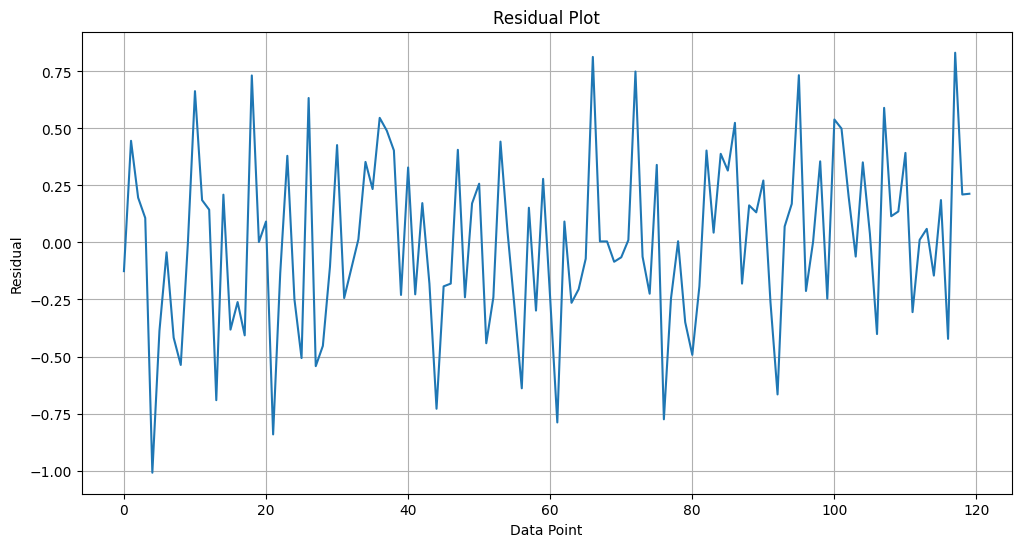

In [ ]:
# prompt: line plot menampilkan residuals

import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test_rescaled - y_pred_rescaled

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(res)
plt.xlabel('Data Point')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


# INI BEDA

In [ ]:
# Fit model hanya pada data training
model_gru.fit(X_train, y_train, epochs=100, batch_size=1, shuffle=False, verbose=1)


Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1144
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1079
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1020
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1051
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1065
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1044
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1054
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1095
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1020
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0995
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1044
Epoch 12/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1054
Epoch 13/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0969
Epoch 14/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1112
Epoch 15/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# Prediksi untuk training dan testing
pred_train = model_gru.predict(X_train, batch_size=1)
pred_test = model_gru.predict(X_test, batch_size=1)


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# Inverse transform hasil prediksi
# Gabungkan dengan X supaya dapat di-inverse scaling
dff_train = np.array(pd.DataFrame(zip(X_train.reshape(X_train.shape[0]), pred_train.reshape(pred_train.shape[0]))))
dff_test = np.array(pd.DataFrame(zip(X_test.reshape(X_test.shape[0]), pred_test.reshape(pred_test.shape[0]))))
df_inv_train = pd.DataFrame(scaler.inverse_transform(dff_train))
df_inv_test = pd.DataFrame(scaler.inverse_transform(dff_test))


In [ ]:
# --- Change 1: Create dates_shifted based on df.Date ---
dates_shifted = df.Date[1:]  # Aligning with data used in previous plots


In [ ]:
# --- Change 2: Ensure test_dates aligns with df_inv_test ---
test_dates = dates_shifted[train_size:]  # Correct slicing for test dates


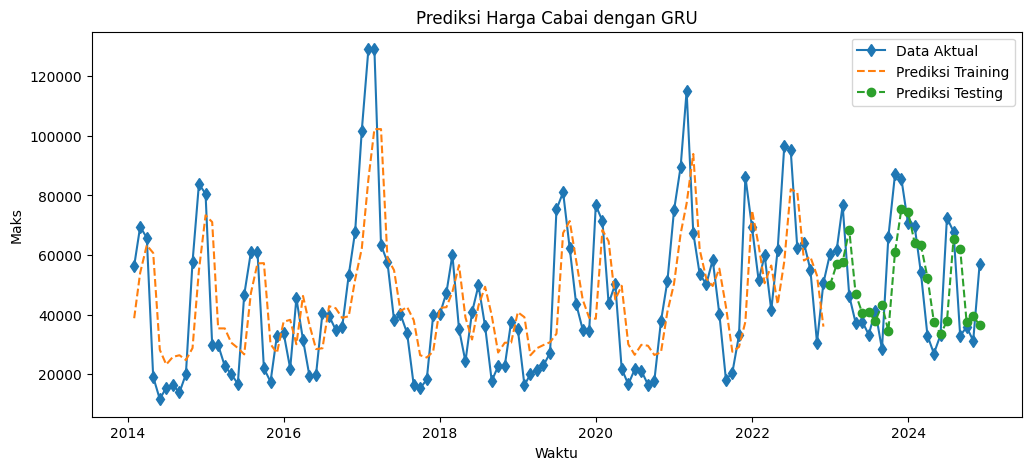

In [ ]:
# Plot hasil prediksi vs data aktual
plt.figure(figsize=(12,5))
plt.plot(dates_shifted, df.Maks[1:].values, marker='d', label='Data Aktual')
plt.plot(dates_shifted[:train_size], df_inv_train[1].values, linestyle='--', label='Prediksi Training')
plt.plot(test_dates, df_inv_test[1].values, linestyle='--', marker='o', label='Prediksi Testing')
plt.xlabel('Waktu')
plt.ylabel('Maks')
plt.legend()
plt.title('Prediksi Harga Cabai dengan GRU')
plt.show()